# Data Preprocessing


1.   Sort the microbiome data and take 99 percent relative abundance, then group them by genus
2.   Call the psychological traits and metabolism data
3. Do CCA



# Bacteria

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import random
import seaborn as sns
import math
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [ ]:
#Read the data (all)
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Microbiome Data.xlsx')
dataset

#OTU ID (Operational Taxonomy Units)     No  Total Abundance  No rel  \
0                                      9266      1          7185598       1   
1                                      6740      2           870639       2   
2                                      7701      4           582192       3   
3                                     29111      9           377700       4   
4                                     16770      3           798298       5   
...                                     ...    ...              ...     ...   
24920                                  8379  24921                0   24921   
24921                                  8156  24922                0   24922   
24922                                  8126  24923                0   24923   
24923                                  7392  24924                0   24924   
24924                                  6603  24925                0   24925   

       Total Rel Abundance  S0046-0001_S22-taxa  S0046-0002_S24-taxa  \
0                25.986097                28831                 7801   
1                 3.242477                  731                 2542   
2                 2.678452                 6296                  512   
3                 2.298651                  246                  327   
4                 1.768469                 3000                   16   
...                    ...                  ...                  ...   
24920             0.000000                    0                    0   
24921             0.000000                    0                    0   
24922             0.000000                    0                    0   
24923             0.000000                    0                    0   
24924             0.000000                    0                    0   

       S0046-0003_S23-taxa  S0046-0004_S25-taxa  S0046-0005_S26-taxa  ...  \
0                   274316               130543                10355  ...   
1                     1638                 2365                  288  ...   
2                      494                  495                  570  ...   
3                     3970                 1475                   39  ...   
4                      572                  298                    2  ...   
...                    ...                  ...                  ...  ...   
24920                    0                    0                    0  ...   
24921                    0                    0                    0  ...   
24922                    0                    0                    0  ...   
24923                    0                    0                    0  ...   
24924                    0                    0                    0  ...   

       S0046-0112_S14-taxa  S0046-0113_S15-taxa  S0046-0114_S16-taxa  k__  \
0                     3704                26049                69884  k__   
1                       74                  620                 1205  k__   
2                     1452                  313                 2950  k__   
3                      122                 2465                 1439  k__   
4                     3205                   89                  487  k__   
...                    ...                  ...                  ...  ...   
24920                    0                    0                    0  k__   
24921                    0                    0                    0  k__   
24922                    0                    0                    0  k__   
24923                    0                    0                    0  k__   
24924                    0                    0                    0  k__   

                          p                        c                     o  \
0             p__Firmicutes               c__Bacilli    o__Lactobacillales   
1         p__Proteobacteria   c__Gammaproteobacteria   o__Enterobacterales   
2         p__Proteobacteria   c__Gammaproteobacteria    o__Burkholderiales   
3       p__Actinobacteriota    

In [ ]:
df=dataset.drop(columns=['No'])
df=df.drop(columns=['No rel'])
df=df.drop(columns=['#OTU ID (Operational Taxonomy Units)'])
df=df.drop(columns=['Total Abundance'])
df=df.drop(columns=['Family'])
df=df.drop(columns=['k__']) #kingdom
df=df.drop(columns=['p']) #phylum
df=df.drop(columns=['c']) #class
df=df.drop(columns=['o']) #order
df=df.drop(columns=['Species'])
df=df.drop(columns=['S0046-0039_S59-taxa']) #To match other two datasets
df

Total Rel Abundance  S0046-0001_S22-taxa  S0046-0002_S24-taxa  \
0                25.986097                28831                 7801   
1                 3.242477                  731                 2542   
2                 2.678452                 6296                  512   
3                 2.298651                  246                  327   
4                 1.768469                 3000                   16   
...                    ...                  ...                  ...   
24920             0.000000                    0                    0   
24921             0.000000                    0                    0   
24922             0.000000                    0                    0   
24923             0.000000                    0                    0   
24924             0.000000                    0                    0   

       S0046-0003_S23-taxa  S0046-0004_S25-taxa  S0046-0005_S26-taxa  \
0                   274316               130543                10355   
1                     1638                 2365                  288   
2                      494                  495                  570   
3                     3970                 1475                   39   
4                      572                  298                    2   
...                    ...                  ...                  ...   
24920                    0                    0                    0   
24921                    0                    0                    0   
24922                    0                    0                    0   
24923                    0                    0                    0   
24924                    0                    0                    0   

       S0046-0006_S27-taxa  S0046-0007_S28-taxa  S0046-0008_S29-taxa  \
0                   234426                24503                65954   
1                      314                 7385                10206   
2                     1144                 5370                 3123   
3                    14029                  206                 4033   
4                     6690                 6983                  677   
...                    ...                  ...                  ...   
24920                    0                    0                    0   
24921                    0                    0                    0   
24922                    0                    0                    0   
24923                    0                    0                    0   
24924                    0                    0                    0   

       S0046-0009_S30-taxa  ...  S0046-0104_S8-taxa  S0046-0105_S9-taxa  \
0                     7337  ...              102593              174018   
1                      352  ...               67396               10095   
2                      323  ...                9586                 188   
3                    28415  ...               13757                2233   
4                     1398  ...                3033                  52   
...                    ...  ...                 ...                 ...   
24920                    0  ...                   0                   0   
24921                    0  ...                   0                   0   
24922                    0  ...                   0                   0   
24923                    0  ...                   0                   0   
24924                    0  ...                   0                   0   

       S0046-0106_S10-taxa  S0046-0107_S11-taxa  S0046-0108_S12-taxa  \
0                    17655                26388                32714   
1                     1481                10157                  476   
2                      971                  679                 2068   
3                      357                 2921                  632   
4                      292                  948                 6575   
...                    ...                  ...                  ...   
24920  

In [ ]:
df1=df.groupby(['Genus']).sum() #by default skipna=True
df1

Total Rel Abundance  S0046-0001_S22-taxa  \
Genus                                                          
g__                            2.072649                 2843   
g__0-14-0-20-30-16             0.000010                    0   
g__0-14-0-20-34-12             0.000014                    0   
g__0-14-0-20-40-13             0.000012                    0   
g__0-14-0-20-44-26             0.000002                    0   
...                                 ...                  ...   
g__Zoogloea                    0.000120                    0   
g__Zooshikella                 0.000034                    0   
g__Zunongwangia                0.000229                    0   
g__Zymobacter                  0.000015                    0   
g__Zymomonas                   0.000056                    1   

                    S0046-0002_S24-taxa  S0046-0003_S23-taxa  \
Genus                                                          
g__                                 935                 5055   
g__0-14-0-20-30-16                    0                    0   
g__0-14-0-20-34-12                    0                    0   
g__0-14-0-20-40-13                    0                    0   
g__0-14-0-20-44-26                    0                    0   
...                                 ...                  ...   
g__Zoogloea                           0                    0   
g__Zooshikella                        0                    0   
g__Zunongwangia                       0                    0   
g__Zymobacter                         0                    0   
g__Zymomonas                          0                    0   

                    S0046-0004_S25-taxa  S0046-0005_S26-taxa  \
Genus                                                          
g__                                3239                  793   
g__0-14-0-20-30-16                    0                    0   
g__0-14-0-20-34-12                    0                    0   
g__0-14-0-20-40-13                    0                    0   
g__0-14-0-20-44-26                    0                    0   
...                                 ...                  ...   
g__Zoogloea                           0                    0   
g__Zooshikella                        0                    0   
g__Zunongwangia                       0                    0   
g__Zymobacter                         0                    0   
g__Zymomonas                          0                    0   

                    S0046-0006_S27-taxa  S0046-0007_S28-taxa  \
Genus                                                          
g__                                6981                 4673   
g__0-14-0-20-30-16                    0                    0   
g__0-14-0-20-34-12                    4                    0   
g__0-14-0-20-40-13                    0                    0   
g__0-14-0-20-44-26                    0                    0   
...                                 ...                  ...   
g__Zoogloea                           0                    0   
g__Zooshikella                        0                    0   
g__Zunongwangia                       0                    1   
g__Zymobacter                         0                    0   
g__Zymomonas                          0                    0   

                    S0046-0008_S29-taxa  S0046-0009_S30-taxa  ...  \
Genus                                                         ...   
g__                                5085                  768  ...   
g__0-14-0-20-30-16                    0                    0  ...   
g__0-14-0-20-34-12                    0                    0  ...   
g__0-14-0-20-40-13                    0                    0  ...   
g__0-14-0-20-44-26                    0                    0  ...   
...                                 ...                  ...  ...   
g__Zoogloea                           0                    0  ...   
g__Zooshikella                        1                    0  ...  

In [ ]:
np.max(df1['Total Rel Abundance'])
#Streptococcus

47.97771419895214

## Cut the data up to 456 (99% relative abundance)

In [ ]:
dataset1 = df.iloc[:456,:]
dataset1

Total Rel Abundance  S0046-0001_S22-taxa  S0046-0002_S24-taxa  \
0              25.986097                28831                 7801   
1               3.242477                  731                 2542   
2               2.678452                 6296                  512   
3               2.298651                  246                  327   
4               1.768469                 3000                   16   
..                   ...                  ...                  ...   
451             0.010789                    0                    0   
452             0.010699                   13                    7   
453             0.010460                    2                    2   
454             0.010241                    0                    0   
455             0.010093                    3                    0   

     S0046-0003_S23-taxa  S0046-0004_S25-taxa  S0046-0005_S26-taxa  \
0                 274316               130543                10355   
1                   1638                 2365                  288   
2                    494                  495                  570   
3                   3970                 1475                   39   
4                    572                  298                    2   
..                   ...                  ...                  ...   
451                    0                    1                    0   
452                   12                    1                    1   
453                    3                    3                    0   
454                    0                    0                    0   
455                    2                   57                    8   

     S0046-0006_S27-taxa  S0046-0007_S28-taxa  S0046-0008_S29-taxa  \
0                 234426                24503                65954   
1                    314                 7385                10206   
2                   1144                 5370                 3123   
3                  14029                  206                 4033   
4                   6690                 6983                  677   
..                   ...                  ...                  ...   
451                    0                    0                    0   
452                   53                    9                    3   
453                   62                   13                    2   
454                    0                    0                    0   
455                    2                    7                    1   

     S0046-0009_S30-taxa  ...  S0046-0104_S8-taxa  S0046-0105_S9-taxa  \
0                   7337  ...              102593              174018   
1                    352  ...               67396               10095   
2                    323  ...                9586                 188   
3                  28415  ...               13757                2233   
4                   1398  ...                3033                  52   
..                   ...  ...                 ...                 ...   
451                    0  ...                   1                   0   
452                   30  ...                 168                   1   
453                    8  ...                  16                   0   
454                    0  ...                   0                   0   
455                    3  ...                   0                  67   

     S0046-0106_S10-taxa  S0046-0107_S11-taxa  S0046-0108_S12-taxa  \
0                  17655                26388                32714   
1                   1481                10157                  476   
2                    971                  679                 2068   
3                    357                 2921                  632   
4                    292                  948                 6575   
..                   ...                  ...                  ...   
451                    0                    0                    0   
452                    4                    4

In [ ]:
df2=dataset1.groupby(['Genus']).sum() #by default skipna=True
df2

Total Rel Abundance  S0046-0001_S22-taxa  \
Genus                                                          
g__                            1.926510                 2657   
g__Abiotrophia                 0.589359                  542   
g__Actinomyces                 3.363486                14410   
g__Aggregatibacter             0.685392                 1242   
g__Alloprevotella              0.174033                    7   
...                                 ...                  ...   
g__Treponema_B                 0.158013                   25   
g__Treponema_C                 0.078275                    0   
g__Treponema_D                 0.063333                   18   
g__Veillonella                 5.039517                 6150   
g__Vibrio                      0.014145                    1   

                    S0046-0002_S24-taxa  S0046-0003_S23-taxa  \
Genus                                                          
g__                                 919                 4943   
g__Abiotrophia                        0                    0   
g__Actinomyces                      291                15751   
g__Aggregatibacter                  288                  268   
g__Alloprevotella                    27                  145   
...                                 ...                  ...   
g__Treponema_B                        9                   21   
g__Treponema_C                       16                    1   
g__Treponema_D                        7                    3   
g__Veillonella                      296                 7241   
g__Vibrio                             1                    6   

                    S0046-0004_S25-taxa  S0046-0005_S26-taxa  \
Genus                                                          
g__                                3059                  749   
g__Abiotrophia                     1057                   19   
g__Actinomyces                      790                   22   
g__Aggregatibacter                  598                  167   
g__Alloprevotella                    73                   40   
...                                 ...                  ...   
g__Treponema_B                       93                   22   
g__Treponema_C                        4                    6   
g__Treponema_D                       16                    4   
g__Veillonella                     5570                  705   
g__Vibrio                            12                   15   

                    S0046-0006_S27-taxa  S0046-0007_S28-taxa  \
Genus                                                          
g__                                6572                 4513   
g__Abiotrophia                     1555                  265   
g__Actinomyces                    26159                 2040   
g__Aggregatibacter                 1413                 4607   
g__Alloprevotella                    70                  305   
...                                 ...                  ...   
g__Treponema_B                      284                  652   
g__Treponema_C                      131                  103   
g__Treponema_D                       16                   67   
g__Veillonella                     2494                 2258   
g__Vibrio                            17                   15   

                    S0046-0008_S29-taxa  S0046-0009_S30-taxa  ...  \
Genus                                                         ...   
g__                                5002                  701  ...   
g__Abiotrophia                       17                    2  ...   
g__Actinomyces                     1942                12600  ...   
g__Aggregatibacter                  481                  174  ...   
g__Alloprevotella                    57                    1  ...   
...                                 ...                  ...  ...   
g__Treponema_B                        2                    0  ...   
g__Treponema_C                        2                    1  ...  

In [ ]:
df2 = df2.drop(columns=['Total Rel Abundance'])
df2

S0046-0001_S22-taxa  S0046-0002_S24-taxa  \
Genus                                                          
g__                                2657                  919   
g__Abiotrophia                      542                    0   
g__Actinomyces                    14410                  291   
g__Aggregatibacter                 1242                  288   
g__Alloprevotella                     7                   27   
...                                 ...                  ...   
g__Treponema_B                       25                    9   
g__Treponema_C                        0                   16   
g__Treponema_D                       18                    7   
g__Veillonella                     6150                  296   
g__Vibrio                             1                    1   

                    S0046-0003_S23-taxa  S0046-0004_S25-taxa  \
Genus                                                          
g__                                4943                 3059   
g__Abiotrophia                        0                 1057   
g__Actinomyces                    15751                  790   
g__Aggregatibacter                  268                  598   
g__Alloprevotella                   145                   73   
...                                 ...                  ...   
g__Treponema_B                       21                   93   
g__Treponema_C                        1                    4   
g__Treponema_D                        3                   16   
g__Veillonella                     7241                 5570   
g__Vibrio                             6                   12   

                    S0046-0005_S26-taxa  S0046-0006_S27-taxa  \
Genus                                                          
g__                                 749                 6572   
g__Abiotrophia                       19                 1555   
g__Actinomyces                       22                26159   
g__Aggregatibacter                  167                 1413   
g__Alloprevotella                    40                   70   
...                                 ...                  ...   
g__Treponema_B                       22                  284   
g__Treponema_C                        6                  131   
g__Treponema_D                        4                   16   
g__Veillonella                      705                 2494   
g__Vibrio                            15                   17   

                    S0046-0007_S28-taxa  S0046-0008_S29-taxa  \
Genus                                                          
g__                                4513                 5002   
g__Abiotrophia                      265                   17   
g__Actinomyces                     2040                 1942   
g__Aggregatibacter                 4607                  481   
g__Alloprevotella                   305                   57   
...                                 ...                  ...   
g__Treponema_B                      652                    2   
g__Treponema_C                      103                    2   
g__Treponema_D                       67                    8   
g__Veillonella                     2258                 2968   
g__Vibrio                            15                   16   

                    S0046-0009_S30-taxa  S0046-0010_S31-taxa  ...  \
Genus                                                         ...   
g__                                 701                 2624  ...   
g__Abiotrophia                        2                  162  ...   
g__Actinomyces                    12600                 7252  ...   
g__Aggregatibacter                  174                  665  ...   
g__Alloprevotella                     1                   90  ...   
...                                 ...                  ...  ...   
g__Treponema_B                        0                   12  ...   
g__Treponema_C                        1                   13  ...  

In [ ]:
df2.to_excel("outputx3.xlsx")

### Transpose

In [ ]:
dft = np.transpose(df2)
dft

Genus                 g__  g__Abiotrophia  g__Actinomyces  g__Aggregatibacter  \
S0046-0001_S22-taxa  2657             542           14410                1242   
S0046-0002_S24-taxa   919               0             291                 288   
S0046-0003_S23-taxa  4943               0           15751                 268   
S0046-0004_S25-taxa  3059            1057             790                 598   
S0046-0005_S26-taxa   749              19              22                 167   
...                   ...             ...             ...                 ...   
S0046-0108_S12-taxa  1451             114             918                 466   
S0046-0111_S13-taxa  1437             553             694                 148   
S0046-0112_S14-taxa  1722             167           16790                 487   
S0046-0113_S15-taxa  1115               2             215                  82   
S0046-0114_S16-taxa  1977             600            2603                 449   

Genus                g__Alloprevotella  g__Anaeroglobus  g__Bacillus  \
S0046-0001_S22-taxa                  7                6            0   
S0046-0002_S24-taxa                 27                3            0   
S0046-0003_S23-taxa                145               26           64   
S0046-0004_S25-taxa                 73               35           47   
S0046-0005_S26-taxa                 40                1           30   
...                                ...              ...          ...   
S0046-0108_S12-taxa                 98                6           22   
S0046-0111_S13-taxa                 17               22            0   
S0046-0112_S14-taxa               3372             1305           31   
S0046-0113_S15-taxa                 83               19           21   
S0046-0114_S16-taxa                258               50           57   

Genus                g__Bacteroides_D  g__Bradyrhizobium  g__Campylobacter_A  \
S0046-0001_S22-taxa                 1                 13                 335   
S0046-0002_S24-taxa                 1                  7                  41   
S0046-0003_S23-taxa                41                 12                 295   
S0046-0004_S25-taxa                58                 18                 272   
S0046-0005_S26-taxa                 0                  8                  95   
...                               ...                ...                 ...   
S0046-0108_S12-taxa                 0                 11                 229   
S0046-0111_S13-taxa                 0                 11                 212   
S0046-0112_S14-taxa                 5                  4                3529   
S0046-0113_S15-taxa                 3                  2                 180   
S0046-0114_S16-taxa               106                 11                  83   

Genus                ...  g__Stomatobaculum  g__Streptococcus  g__TM7x  \
S0046-0001_S22-taxa  ...                 35             57480       20   
S0046-0002_S24-taxa  ...                  0             14352        1   
S0046-0003_S23-taxa  ...                 11            474731        7   
S0046-0004_S25-taxa  ...                 18            256786        7   
S0046-0005_S26-taxa  ...                  0             19226        7   
...                  ...                ...               ...      ...   
S0046-0108_S12-taxa  ...                  3             54670       14   
S0046-0111_S13-taxa  ...                  5             51639        3   
S0046-0112_S14-taxa  ...                240              8108      582   
S0046-0113_S15-taxa  ...                  2             46800        3   
S0046-0114_S16-taxa  ...                 18            126672        6   

Genus                g__Tannerella  g__Treponema_A  g__Treponema_B  \
S0046-0001_S22-taxa            169              12              25   
S0046-0002_S24-taxa             34              22               9   
S0046-0003_S23-taxa             41              10              21   
S0046-0004_S25-taxa             

In [ ]:
dft.to_excel("output dft cca.xlsx")

In [ ]:
dft1 = pd.read_excel('/content/output dft cca.xlsx', header=0)
dft1

Unnamed: 0   g__   g__Abiotrophia   g__Actinomyces  \
0    S0046-0001_S22-taxa  2657              542            14410   
1    S0046-0002_S24-taxa   919                0              291   
2    S0046-0003_S23-taxa  4943                0            15751   
3    S0046-0004_S25-taxa  3059             1057              790   
4    S0046-0005_S26-taxa   749               19               22   
..                   ...   ...              ...              ...   
100  S0046-0108_S12-taxa  1451              114              918   
101  S0046-0111_S13-taxa  1437              553              694   
102  S0046-0112_S14-taxa  1722              167            16790   
103  S0046-0113_S15-taxa  1115                2              215   
104  S0046-0114_S16-taxa  1977              600             2603   

      g__Aggregatibacter   g__Alloprevotella   g__Anaeroglobus   g__Bacillus  \
0                   1242                   7                 6             0   
1                    288                  27                 3             0   
2                    268                 145                26            64   
3                    598                  73                35            47   
4                    167                  40                 1            30   
..                   ...                 ...               ...           ...   
100                  466                  98                 6            22   
101                  148                  17                22             0   
102                  487                3372              1305            31   
103                   82                  83                19            21   
104                  449                 258                50            57   

      g__Bacteroides_D   g__Bradyrhizobium  ...   g__Stomatobaculum  \
0                    1                  13  ...                  35   
1                    1                   7  ...                   0   
2                   41                  12  ...                  11   
3                   58                  18  ...                  18   
4                    0                   8  ...                   0   
..                 ...                 ...  ...                 ...   
100                  0                  11  ...                   3   
101                  0                  11  ...                   5   
102                  5                   4  ...                 240   
103                  3                   2  ...                   2   
104                106                  11  ...                  18   

      g__Streptococcus   g__TM7x   g__Tannerella   g__Treponema_A  \
0                57480        20             169               12   
1                14352         1              34               22   
2               474731         7              41               10   
3               256786         7              49               27   
4                19226         7              18               18   
..                 ...       ...             ...              ...   
100              54670        14             326              280   
101              51639         3              31               13   
102               8108       582            4418             1911   
103              46800         3             284               78   
104             126672         6              24              114   

      g__Treponema_B   g__Treponema_C   g__Treponema_D   g__Veillonella  \
0                 25                0               18             6150   
1                  9               16                7              296   
2                 21                1                3             7241   
3                 93                4               16             5570   
4                 22                6                4              705   
..               ...              ...              ...              ...   
100              188         

In [ ]:
dft1.describe()

g__  g__Abiotrophia  g__Actinomyces  g__Aggregatibacter  \
count    105.000000      105.000000      105.000000          105.000000   
mean    4558.285714     1495.857143     8959.133333         1521.390476   
std     5006.696607     3941.344437    25175.519668         2160.548864   
min      156.000000        0.000000       22.000000            0.000000   
25%     1251.000000       21.000000      588.000000          268.000000   
50%     2688.000000      167.000000     1942.000000          665.000000   
75%     5525.000000      906.000000     5095.000000         1790.000000   
max    26087.000000    22524.000000   216946.000000        11117.000000   

       g__Alloprevotella  g__Anaeroglobus  g__Bacillus  g__Bacteroides_D  \
count         105.000000       105.000000   105.000000        105.000000   
mean          183.942857        75.409524    37.485714         38.304762   
std           381.349623       174.311927    22.443996         97.988532   
min             1.000000         0.000000     0.000000          0.000000   
25%            36.000000         8.000000    22.000000          1.000000   
50%            73.000000        22.000000    38.000000          7.000000   
75%           145.000000        55.000000    48.000000         41.000000   
max          3372.000000      1305.000000   117.000000        726.000000   

       g__Bradyrhizobium  g__Campylobacter_A  ...  g__Stomatobaculum  \
count         105.000000          105.000000  ...         105.000000   
mean           12.076190          496.161905  ...          61.066667   
std             8.182645          843.882421  ...         236.882893   
min             1.000000           26.000000  ...           0.000000   
25%             6.000000          138.000000  ...           3.000000   
50%            10.000000          229.000000  ...           8.000000   
75%            15.000000          441.000000  ...          21.000000   
max            43.000000         5417.000000  ...        2177.000000   

       g__Streptococcus      g__TM7x  g__Tannerella  g__Treponema_A  \
count        105.000000   105.000000     105.000000      105.000000   
mean      124842.771429    62.828571     936.342857      156.676190   
std       128077.489998   161.027438    2933.388969      300.075904   
min         1433.000000     0.000000       4.000000        0.000000   
25%        33656.000000     6.000000      84.000000       26.000000   
50%        71271.000000    17.000000     171.000000       76.000000   
75%       175706.000000    48.000000     388.000000      155.000000   
max       539303.000000  1369.000000   19465.000000     1911.000000   

       g__Treponema_B  g__Treponema_C  g__Treponema_D  g__Veillonella  \
count      105.000000      105.000000      105.000000      105.000000   
mean       110.571429       61.628571       83.704762    12971.866667   
std        153.479819       96.813387      270.666411    32514.453034   
min          0.000000        0.000000        0.000000      118.000000   
25%         16.000000        8.000000        9.000000     1792.000000   
50%         51.000000       24.000000       18.000000     4856.000000   
75%        154.000000       61.000000       39.000000    10987.000000   
max        967.000000      422.000000     1955.000000   300001.000000   

        g__Vibrio  
count  105.000000  
mean    11.600000  
std      6.059957  
min      0.000000  
25%      8.000000  
50%     11.000000  
75%     16.000000  
max     28.000000  

[8 rows x 78 columns]

# Correlation

In [ ]:
dmic = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Psychological Traits and Metabolism Data.xlsx') # X and Y datasets
dmic

SampleID  Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0    S0046-0001                         10                          11   
1    S0046-0002                         12                          14   
2    S0046-0003                         11                          13   
3    S0046-0004                          8                          10   
4    S0046-0005                          9                          13   
..          ...                        ...                         ...   
100  S0046-0108                          7                           9   
101  S0046-0111                          7                          10   
102  S0046-0112                         11                          12   
103  S0046-0113                          9                           9   
104  S0046-0114                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  ...  \
0                              18.166667                   0.0  ...   
1                               2.000000                   0.0  ...   
2                               5.750000                   0.0  ...   
3                               6.750000                   0.0  ...   
4                               2.000000                   0.0  ...   
..                                  

In [ ]:
dmicx = dmic.drop(columns=['SampleID'])
dmicx = dmicx.drop(columns=['Q12_IsSmoker'])
dmicx

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
0                              18.166667                   0.0   
1                               2.000000                   0.0   
2                               5.750000                   0.0   
3                               6.750000                   0.0   
4                               2.000000                   0.0   
..                                   ...                   ...   
100                             7.583333                   1.0   
101                            10.500000                   0.5   
102       

In [ ]:
dft1x = dft1.drop(columns=['Unnamed: 0']) # Z dataset
dft1x

g__  g__Abiotrophia  g__Actinomyces  g__Aggregatibacter  \
0    2657             542           14410                1242   
1     919               0             291                 288   
2    4943               0           15751                 268   
3    3059            1057             790                 598   
4     749              19              22                 167   
..    ...             ...             ...                 ...   
100  1451             114             918                 466   
101  1437             553             694                 148   
102  1722             167           16790                 487   
103  1115               2             215                  82   
104  1977             600            2603                 449   

     g__Alloprevotella  g__Anaeroglobus  g__Bacillus  g__Bacteroides_D  \
0                    7                6            0                 1   
1                   27                3            0                 1   
2                  145               26           64                41   
3                   73               35           47                58   
4                   40                1           30                 0   
..                 ...              ...          ...               ...   
100                 98                6           22                 0   
101                 17               22            0                 0   
102               3372             1305           31                 5   
103                 83               19           21                 3   
104                258               50           57               106   

     g__Bradyrhizobium  g__Campylobacter_A  ...  g__Stomatobaculum  \
0                   13                 335  ...                 35   
1                    7                  41  ...                  0   
2                   12                 295  ...                 11   
3                   18                 272  ...                 18   
4                    8                  95  ...                  0   
..                 ...                 ...  ...                ...   
100                 11                 229  ...                  3   
101                 11                 212  ...                  5   
102                  4                3529  ...                240   
103                  2                 180  ...                  2   
104                 11                  83  ...                 18   

     g__Streptococcus  g__TM7x  g__Tannerella  g__Treponema_A  g__Treponema_B  \
0               57480       20            169              12              25   
1               14352        1             34              22               9   
2              474731        7             41              10              21   
3              256786        7             49              27              93   
4               19226        7             18              18              22   
..                ...      ...            ...             ...             ...   
100             54670       14            326             280             188   
101             51639        3             31              13               3   
102              8108      582           4418            1911             967   
103             46800        3            284              78             173   
104            126672        6             24             114               5   

     g__Treponema_C  g__Treponema_D  g__Veillonella  g__Vibrio  
0                 0              18            6150          1  
1                16               7             296          1  
2                 1               3            7241          6  
3                 4              16            5570         12  
4                 6               4             705         15  
..              ...             ...             ...        ...  
100             101              22             407          4  
10

In [ ]:
d_allx = pd.concat([dmicx,dft1x],axis=1) # All datasets
d_allx

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
0                              18.166667                   0.0   
1                               2.000000                   0.0   
2                               5.750000                   0.0   
3                               6.750000                   0.0   
4                               2.000000                   0.0   
..                                   ...                   ...   
100                             7.583333                   1.0   
101                            10.500000                   0.5   
102       

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
d_x = dmicx[['Q39_BFI-2-xs-Agreeableness','Q39_BFI-2-xs-Conscientiousness','Q39_BFI-2-xs-Extraversion','Q39_BFI-2-xs-Negative Emotionality','Q39_BFI-2-xs-Open Mindedness']]
d_x

Q39_BFI-2-xs-Agreeableness  Q39_BFI-2-xs-Conscientiousness  \
0                            11                               6   
1                            14                              15   
2                            13                              11   
3                            10                               4   
4                            13                              14   
..                          ...                             ...   
100                           9                               9   
101                          10                              10   
102                          12                               9   
103                           9                               9   
104                          10                              13   

     Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Negative Emotionality  \
0                           10                                  12   
1                           12                                   4   
2                           11                                   9   
3                            8                                  13   
4                            9                                   8   
..                         ...                                 ...   
100                          7                                  11   
101                          7                                  13   
102                         11                                   8   
103                          9                                   9   
104                         13                                   3   

     Q39_BFI-2-xs-Open Mindedness  
0                               9  
1                              13  
2                               7  
3                              10  
4                              11  
..                            ...  
100                            12  
101                            10  
102                             7  
103                             9  
104                            10  

[105 rows x 5 columns]

In [ ]:
d_y = dmicx.drop(columns=['Q39_BFI-2-xs-Agreeableness'])
d_y = d_y.drop(columns=['Q39_BFI-2-xs-Conscientiousness'])
d_y = d_y.drop(columns=['Q39_BFI-2-xs-Extraversion'])
d_y = d_y.drop(columns=['Q39_BFI-2-xs-Negative Emotionality'])
d_y = d_y.drop(columns=['Q39_BFI-2-xs-Open Mindedness'])
d_y

Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
0                              18.166667                   0.0   
1                               2.000000                   0.0   
2                               5.750000                   0.0   
3                               6.750000                   0.0   
4                               2.000000                   0.0   
..                                   ...                   ...   
100                             7.583333                   1.0   
101                            10.500000                   0.5   
102                             1.333333                   0.0   
103                             2.000000                   0.0   
104                             3.000000                   0.0   

     Carbon monoxide dehydrogenase maturation factors  \
0                                                 0.0   
1                                                 0.0   
2                                                 0.0   
3                                                 0.0   
4                                                 0.0   
..                                                ...   
100                                               0.0   
101                                               0.0   
102                                               0.0   
103                                               0.0   
104                                               0.0   

     Carbon monoxide induced hydrogenase  \
0                                    6.0   
1                                    1.0   
2                                   11.0   
3                                    2.0   
4                                    0.0   
..                                   ...   
100                                  1.0   
101                                  3.0   
102                                 17.0   
103                                  0.0   
104                                  2.0   

     Energy-conserving hydrogenase (ferredoxin)  Flavodoxin  Glutaredoxins  \
0                                           0.0        61.0     163.741270   
1                                           0.0        11.0      42.060714   
2                                           0.0        96.0     488.964683   
3                                           0.0        53.0     342.170635   
4                                           0.0         9.0      39.485714   
..                                          ...         ...            ...   
100                                         0.0        16.0      87.961905   
101                                         0.0        14.0     

In [ ]:
d_z = dft1x

In [ ]:
dxdz = pd.concat([d_x,d_z],axis=1)
dxdz

Q39_BFI-2-xs-Agreeableness  Q39_BFI-2-xs-Conscientiousness  \
0                            11                               6   
1                            14                              15   
2                            13                              11   
3                            10                               4   
4                            13                              14   
..                          ...                             ...   
100                           9                               9   
101                          10                              10   
102                          12                               9   
103                           9                               9   
104                          10                              13   

     Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Negative Emotionality  \
0                           10                                  12   
1                           12                                   4   
2                           11                                   9   
3                            8                                  13   
4                            9                                   8   
..                         ...                                 ...   
100                          7                                  11   
101                          7                                  13   
102                         11                                   8   
103                          9                                   9   
104                         13                                   3   

     Q39_BFI-2-xs-Open Mindedness   g__   g__Abiotrophia   g__Actinomyces  \
0                               9  2657              542            14410   
1                              13   919                0              291   
2                               7  4943                0            15751   
3                              10  3059             1057              790   
4                              11   749               19               22   
..                            ...   ...              ...              ...   
100                            12  1451              114              918   
101                            10  1437              553              694   
102                             7  1722              167            16790   
103                             9  1115                2              215   
104                            10  1977              600             2603   

      g__Aggregatibacter   g__Alloprevotella  ...   g__Stomatobaculum  \
0                   1242                   7  ...                  35   
1                    288                  27  ...                   0   
2                    268                 145  ...                  11   
3                    598                  73  ...                  18   
4                    167                  40  ...                   0   
..                   ...                 ...  ...                 ...   
100                  466                  98  ...                   3   
101                  148                  17  ...                   5   
102                  487                3372  ...                 240   
103                   82                  83  ...                   2   
104                  449                 258  ...                  18   

      g__Streptococcus   g__TM7x   g__Tannerella   g__Treponema_A  \
0                57480        20             169               12   
1                14352         1              34               22   
2               474731         7              41               10   
3               256786         7              49               27   
4                19226         7              18               18   
..                 ...       ...             ...              ...   
100              54670        14             326              280   
101  

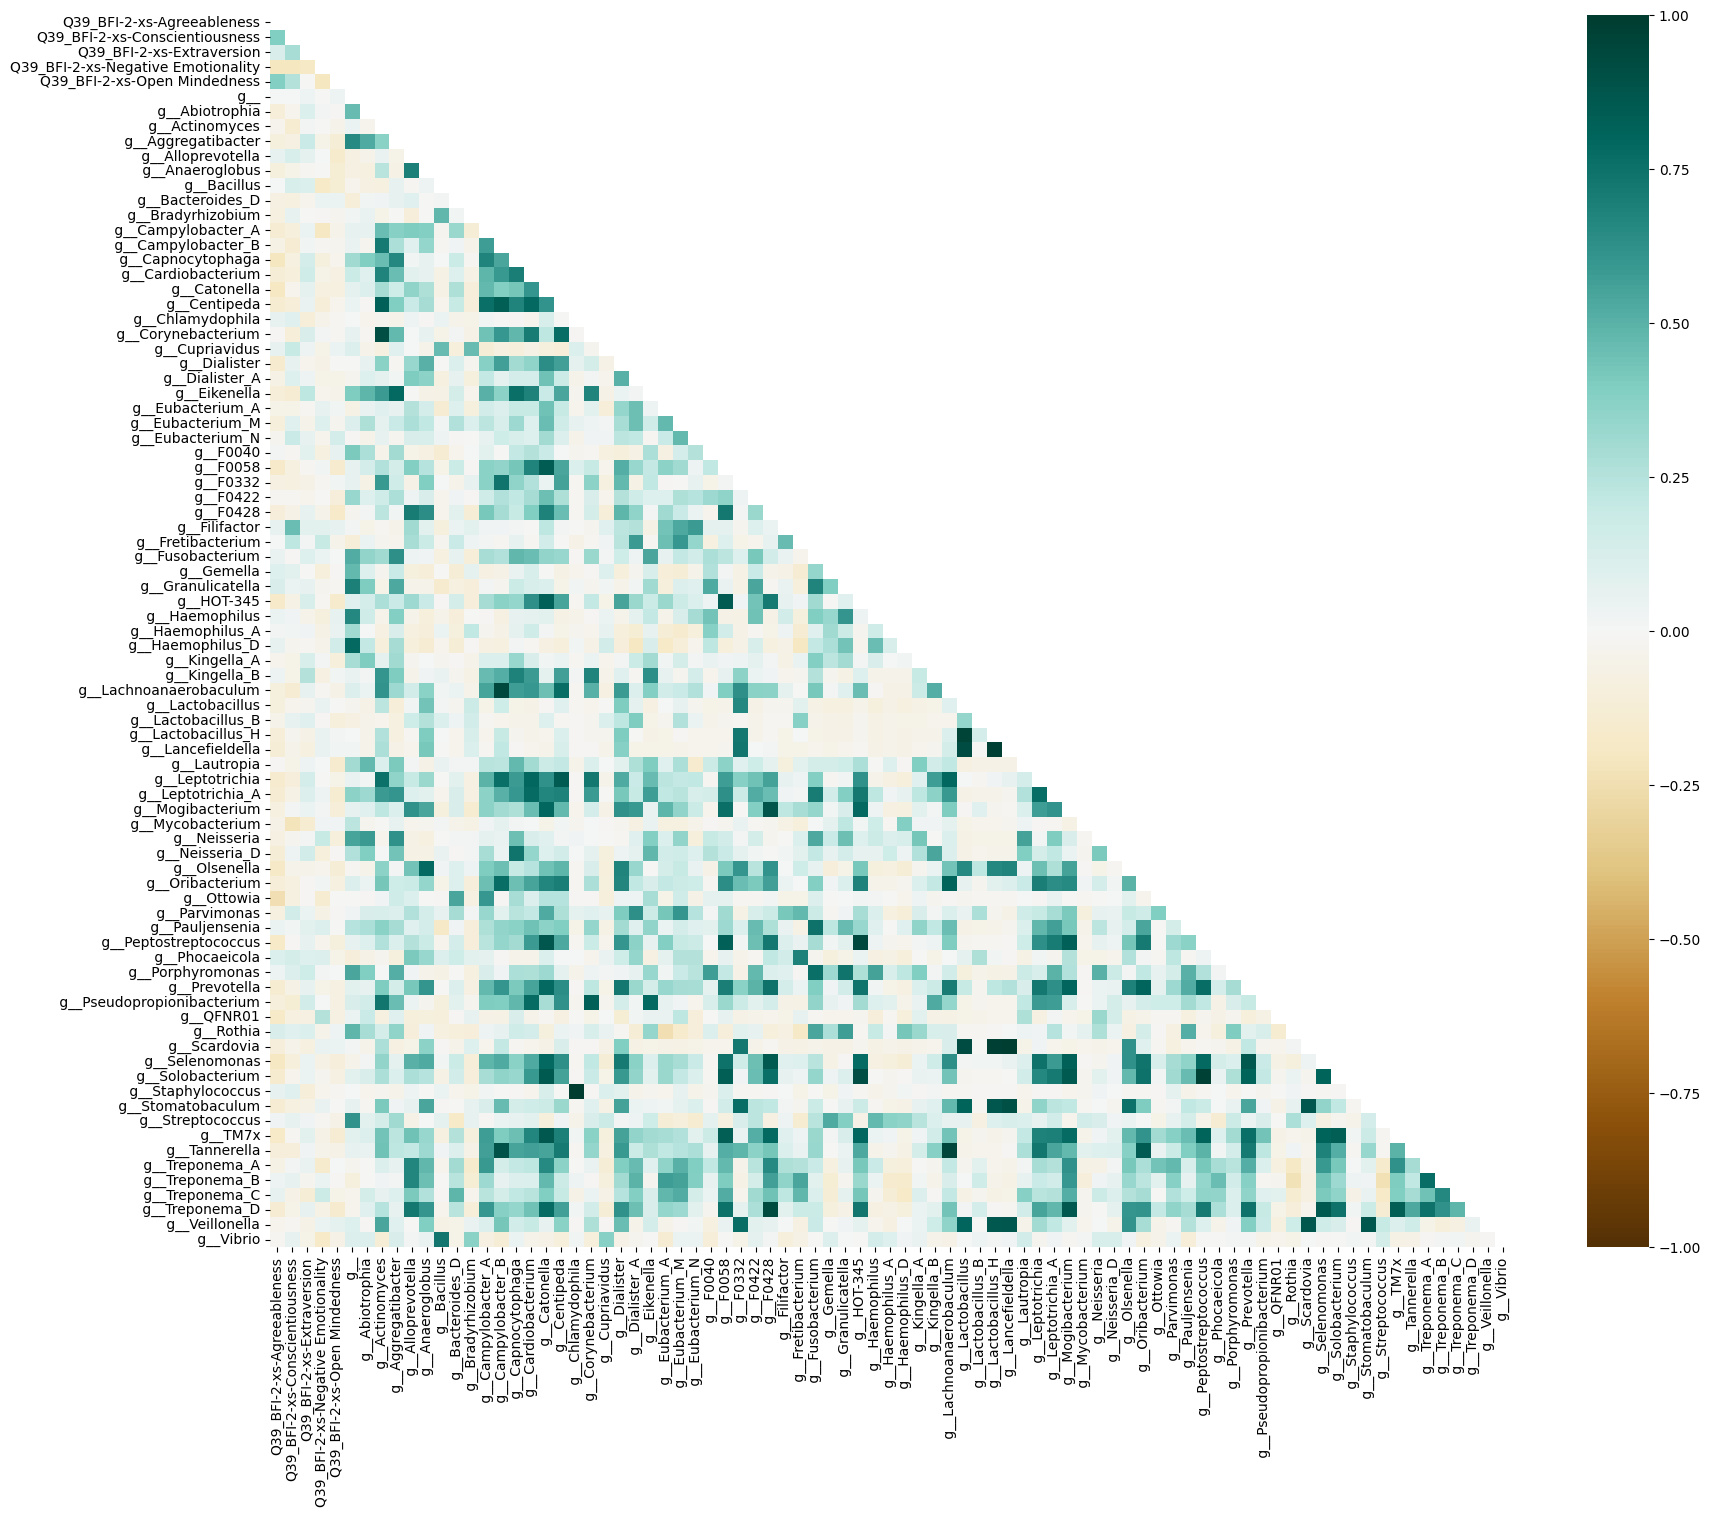

In [ ]:
plt.figure(figsize=(20, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dxdz.corr(method='pearson')))
heatmap = sns.heatmap(dxdz.corr(method='pearson'), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')

In [ ]:
dydz = pd.concat([d_y,d_z],axis=1)

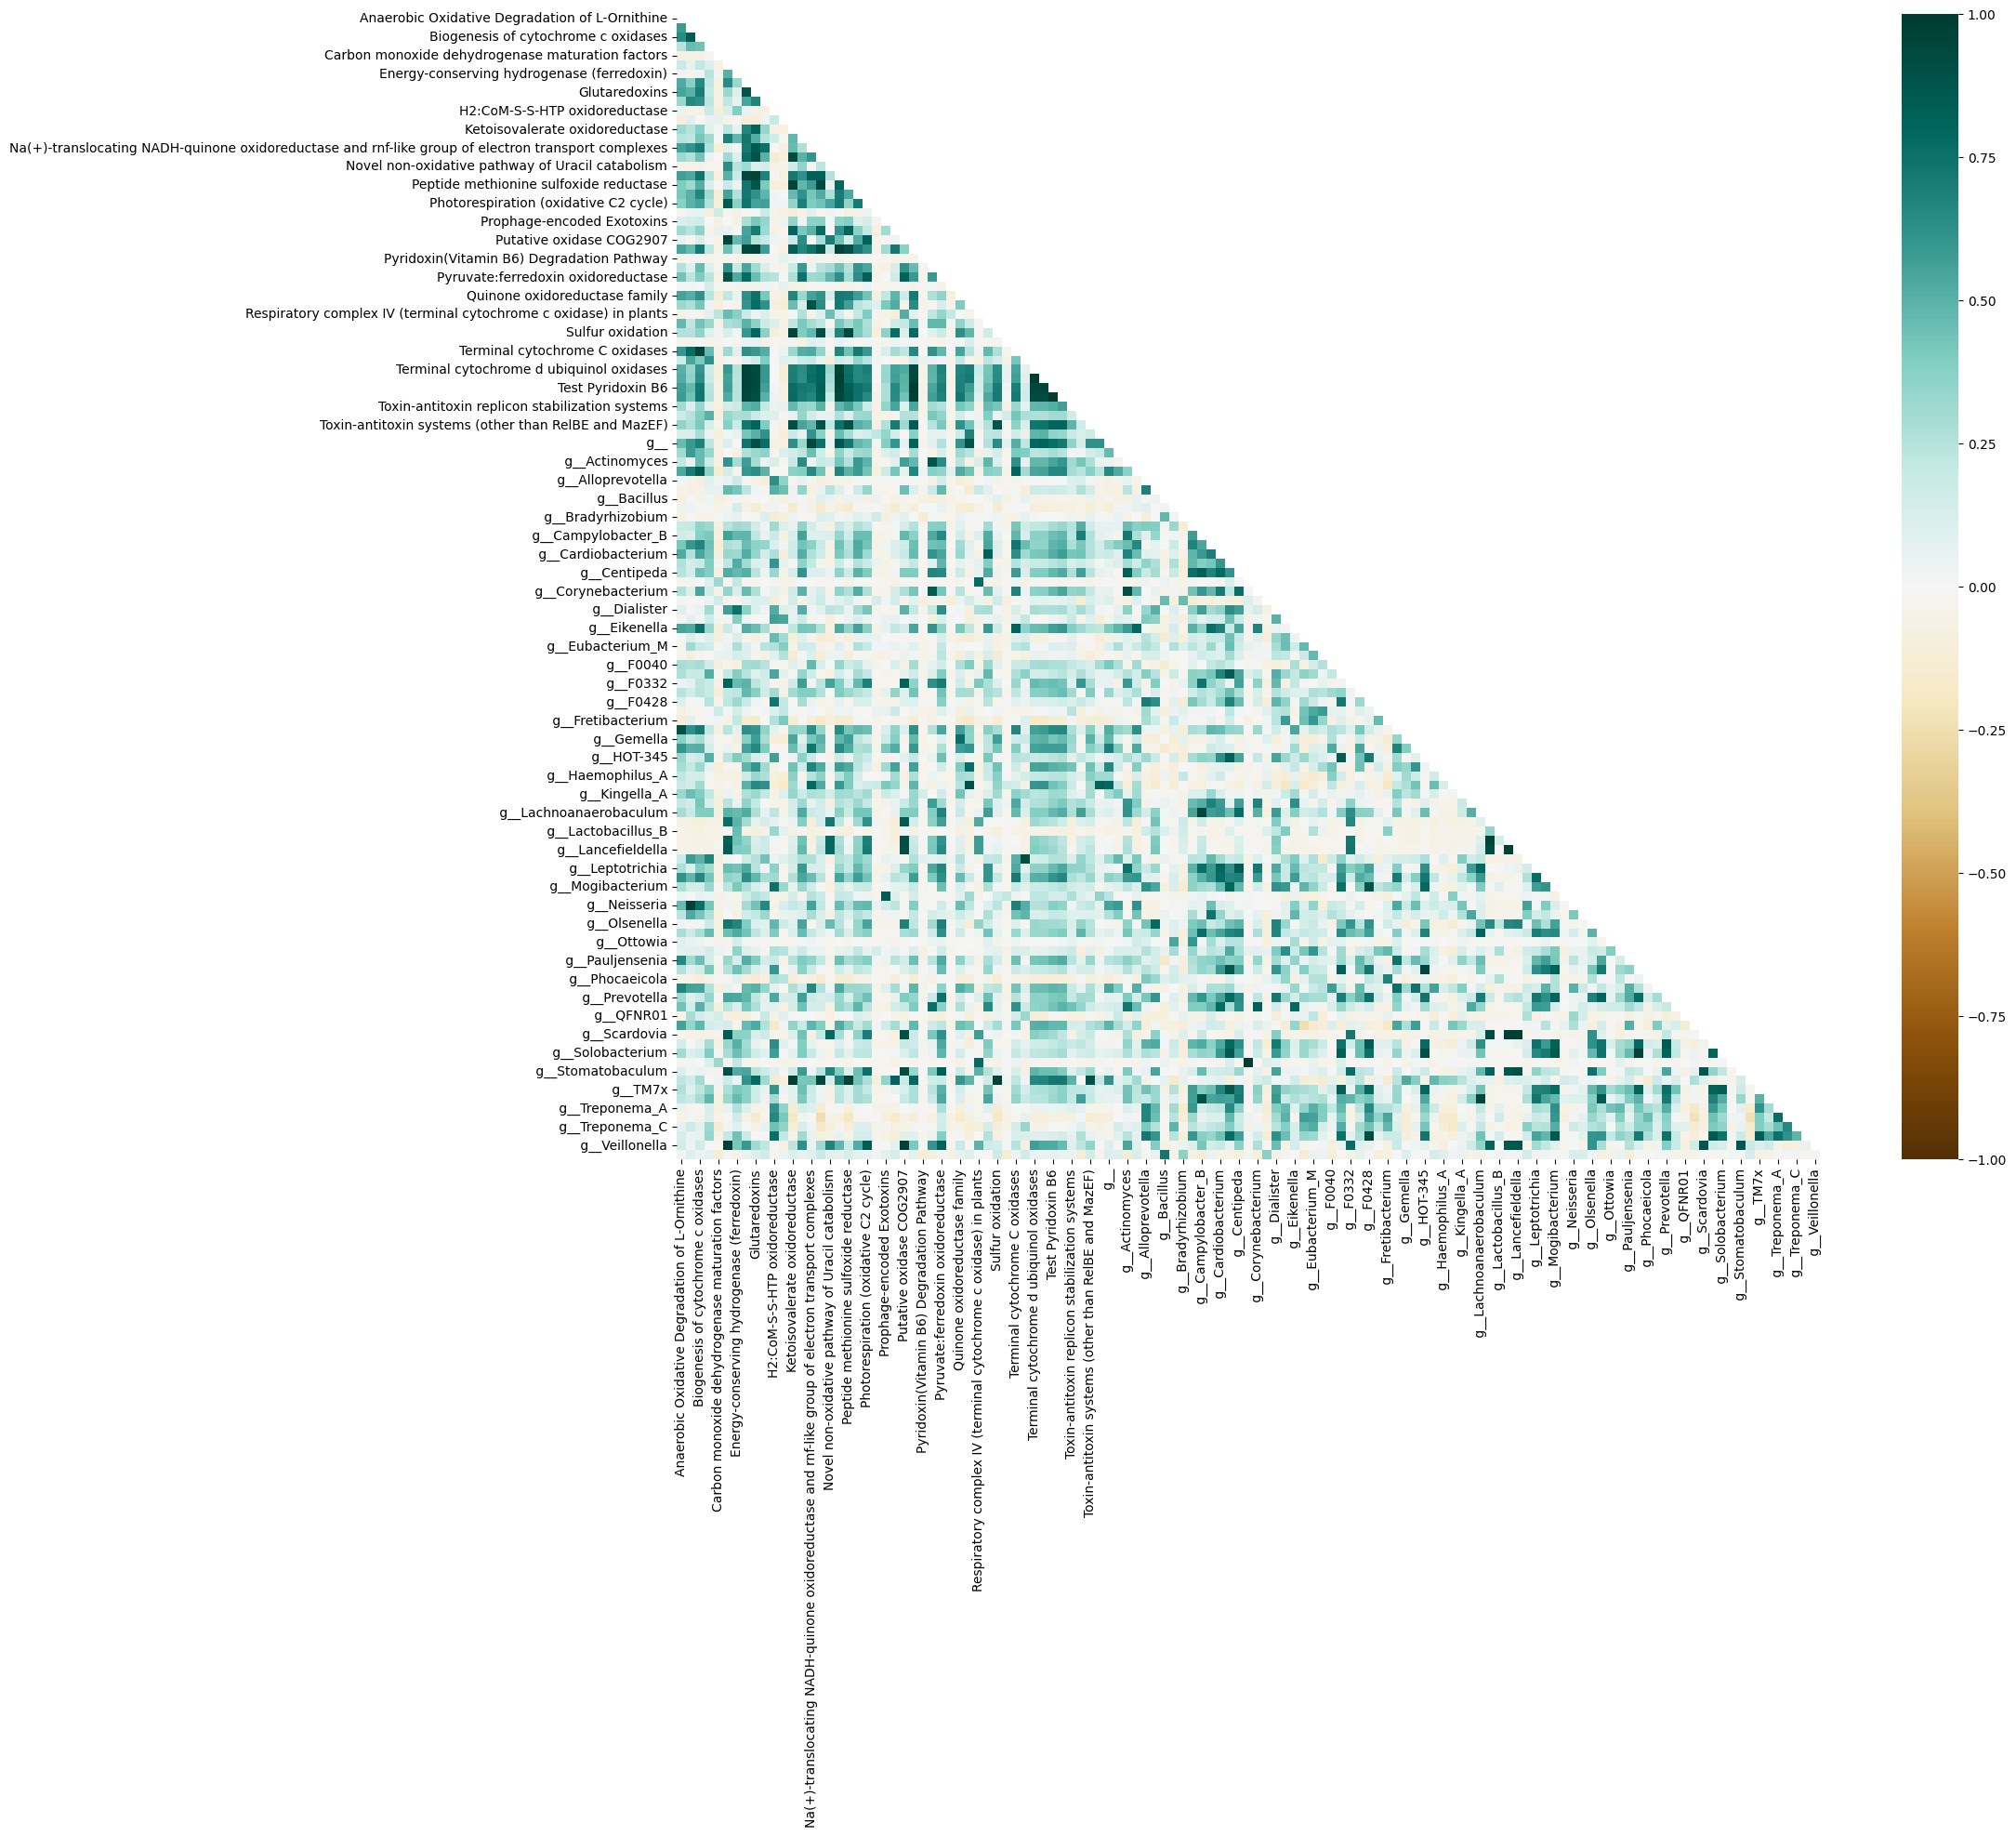

In [ ]:
plt.figure(figsize=(20, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dydz.corr(method='pearson')))
heatmap = sns.heatmap(dydz.corr(method='pearson'), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')

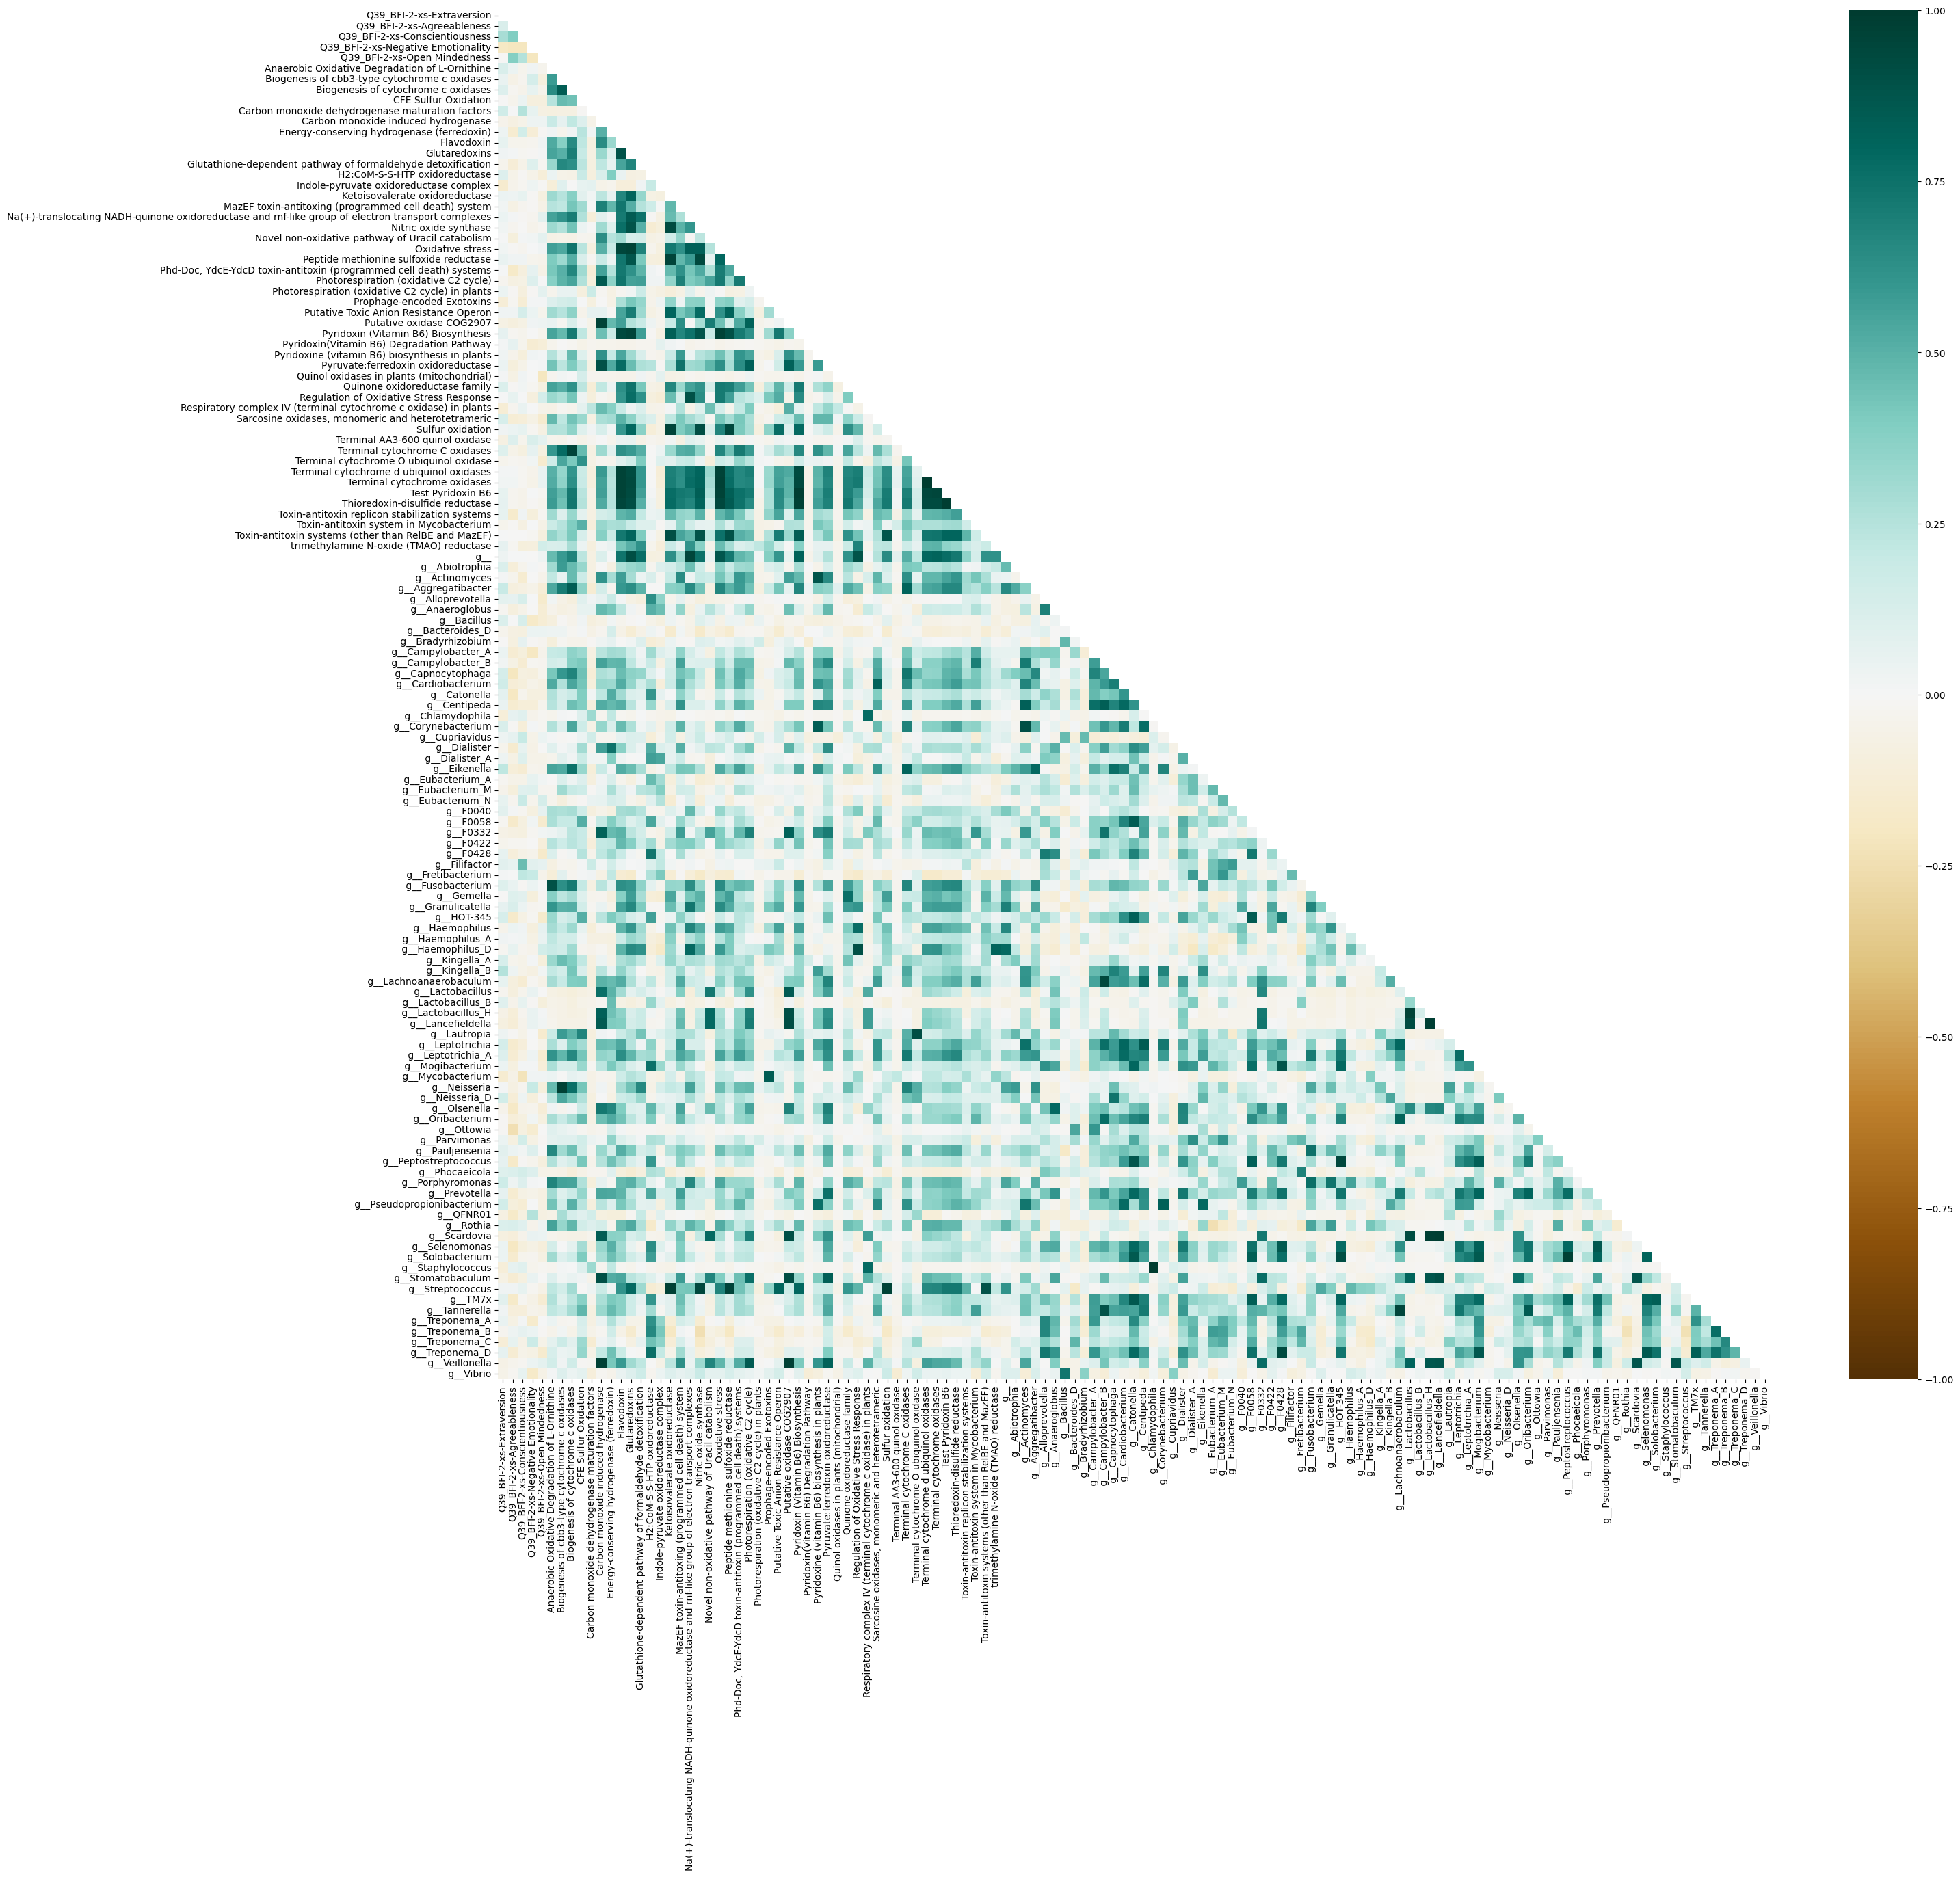

In [ ]:
plt.figure(figsize=(30, 26))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(d_allx.corr(method='pearson')))
heatmap = sns.heatmap(d_allx.corr(method='pearson'), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')

In [ ]:
correlations = d_allx.corr()
correlations

Q39_BFI-2-xs-Extraversion  \
Q39_BFI-2-xs-Extraversion                            1.000000   
Q39_BFI-2-xs-Agreeableness                           0.124271   
Q39_BFI-2-xs-Conscientiousness                       0.286574   
Q39_BFI-2-xs-Negative Emotionality                  -0.188391   
Q39_BFI-2-xs-Open Mindedness                        -0.000326   
...                                                       ...   
 g__Treponema_B                                     -0.026611   
 g__Treponema_C                                     -0.118436   
 g__Treponema_D                                      0.065354   
 g__Veillonella                                     -0.056570   
 g__Vibrio                                          -0.049424   

                                    Q39_BFI-2-xs-Agreeableness  \
Q39_BFI-2-xs-Extraversion                             0.124271   
Q39_BFI-2-xs-Agreeableness                            1.000000   
Q39_BFI-2-xs-Conscientiousness                        0.395551   
Q39_BFI-2-xs-Negative Emotionality                   -0.203458   
Q39_BFI-2-xs-Open Mindedness                          0.384486   
...                                                        ...   
 g__Treponema_B                                       0.037770   
 g__Treponema_C                                       0.061866   
 g__Treponema_D                                      -0.137145   
 g__Veillonella                                      -0.031348   
 g__Vibrio                                           -0.016371   

                                    Q39_BFI-2-xs-Conscientiousness  \
Q39_BFI-2-xs-Extraversion                                 0.286574   
Q39_BFI-2-xs-Agreeableness                                0.395551   
Q39_BFI-2-xs-Conscientiousness                            1.000000   
Q39_BFI-2-xs-Negative Emotionality                       -0.205131   
Q39_BFI-2-xs-Open Mindedness                              0.252866   
...                                                            ...   
 g__Treponema_B                                           0.069262   
 g__Treponema_C                                          -0.055946   
 g__Treponema_D                                          -0.051857   
 g__Veillonella                                          -0.023306   
 g__Vibrio                                                0.054954   

                                    Q39_BFI-2-xs-Negative Emotionality  \
Q39_BFI-2-xs-Extraversion                                    -0.188391   
Q39_BFI-2-xs-Agreeableness                                   -0.203458   
Q39_BFI-2-xs-Conscientiousness                               -0.205131   
Q39_BFI-2-xs-Negative Emotionality                            1.000000   
Q39_BFI-2-xs-Open Mindedness                                 -0.207316   
...                                                                ...   
 g__Treponema_B                                               0.042208   
 g__Treponema_C                                               0.177136   
 g__Treponema_D                                              -0.069548   
 g__Veillonella                                               0.045617   
 g__Vibrio                                                   -0.177557   

                                    Q39_BFI-2-xs-Open Mindedness  \
Q39_BFI-2-xs-Extraversion                              -0.000326   
Q39_BFI-2-xs-Agreeableness                              0.384486   
Q39_BFI-2-xs-Conscientiousness                          0.252866   
Q39_BFI-2-xs-Negative Emotionality                     -0.207316   
Q39_BFI-2-xs-Open Mindedness                            1.000000   
...                                                          ...   
 g__Treponema_B                                        -0.013432   
 g__Treponema_C                                        -0.054205   
 g__Treponema_D                                        -0.152886   
 g__Veillonella                                     

## Clustered correalation heat map

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


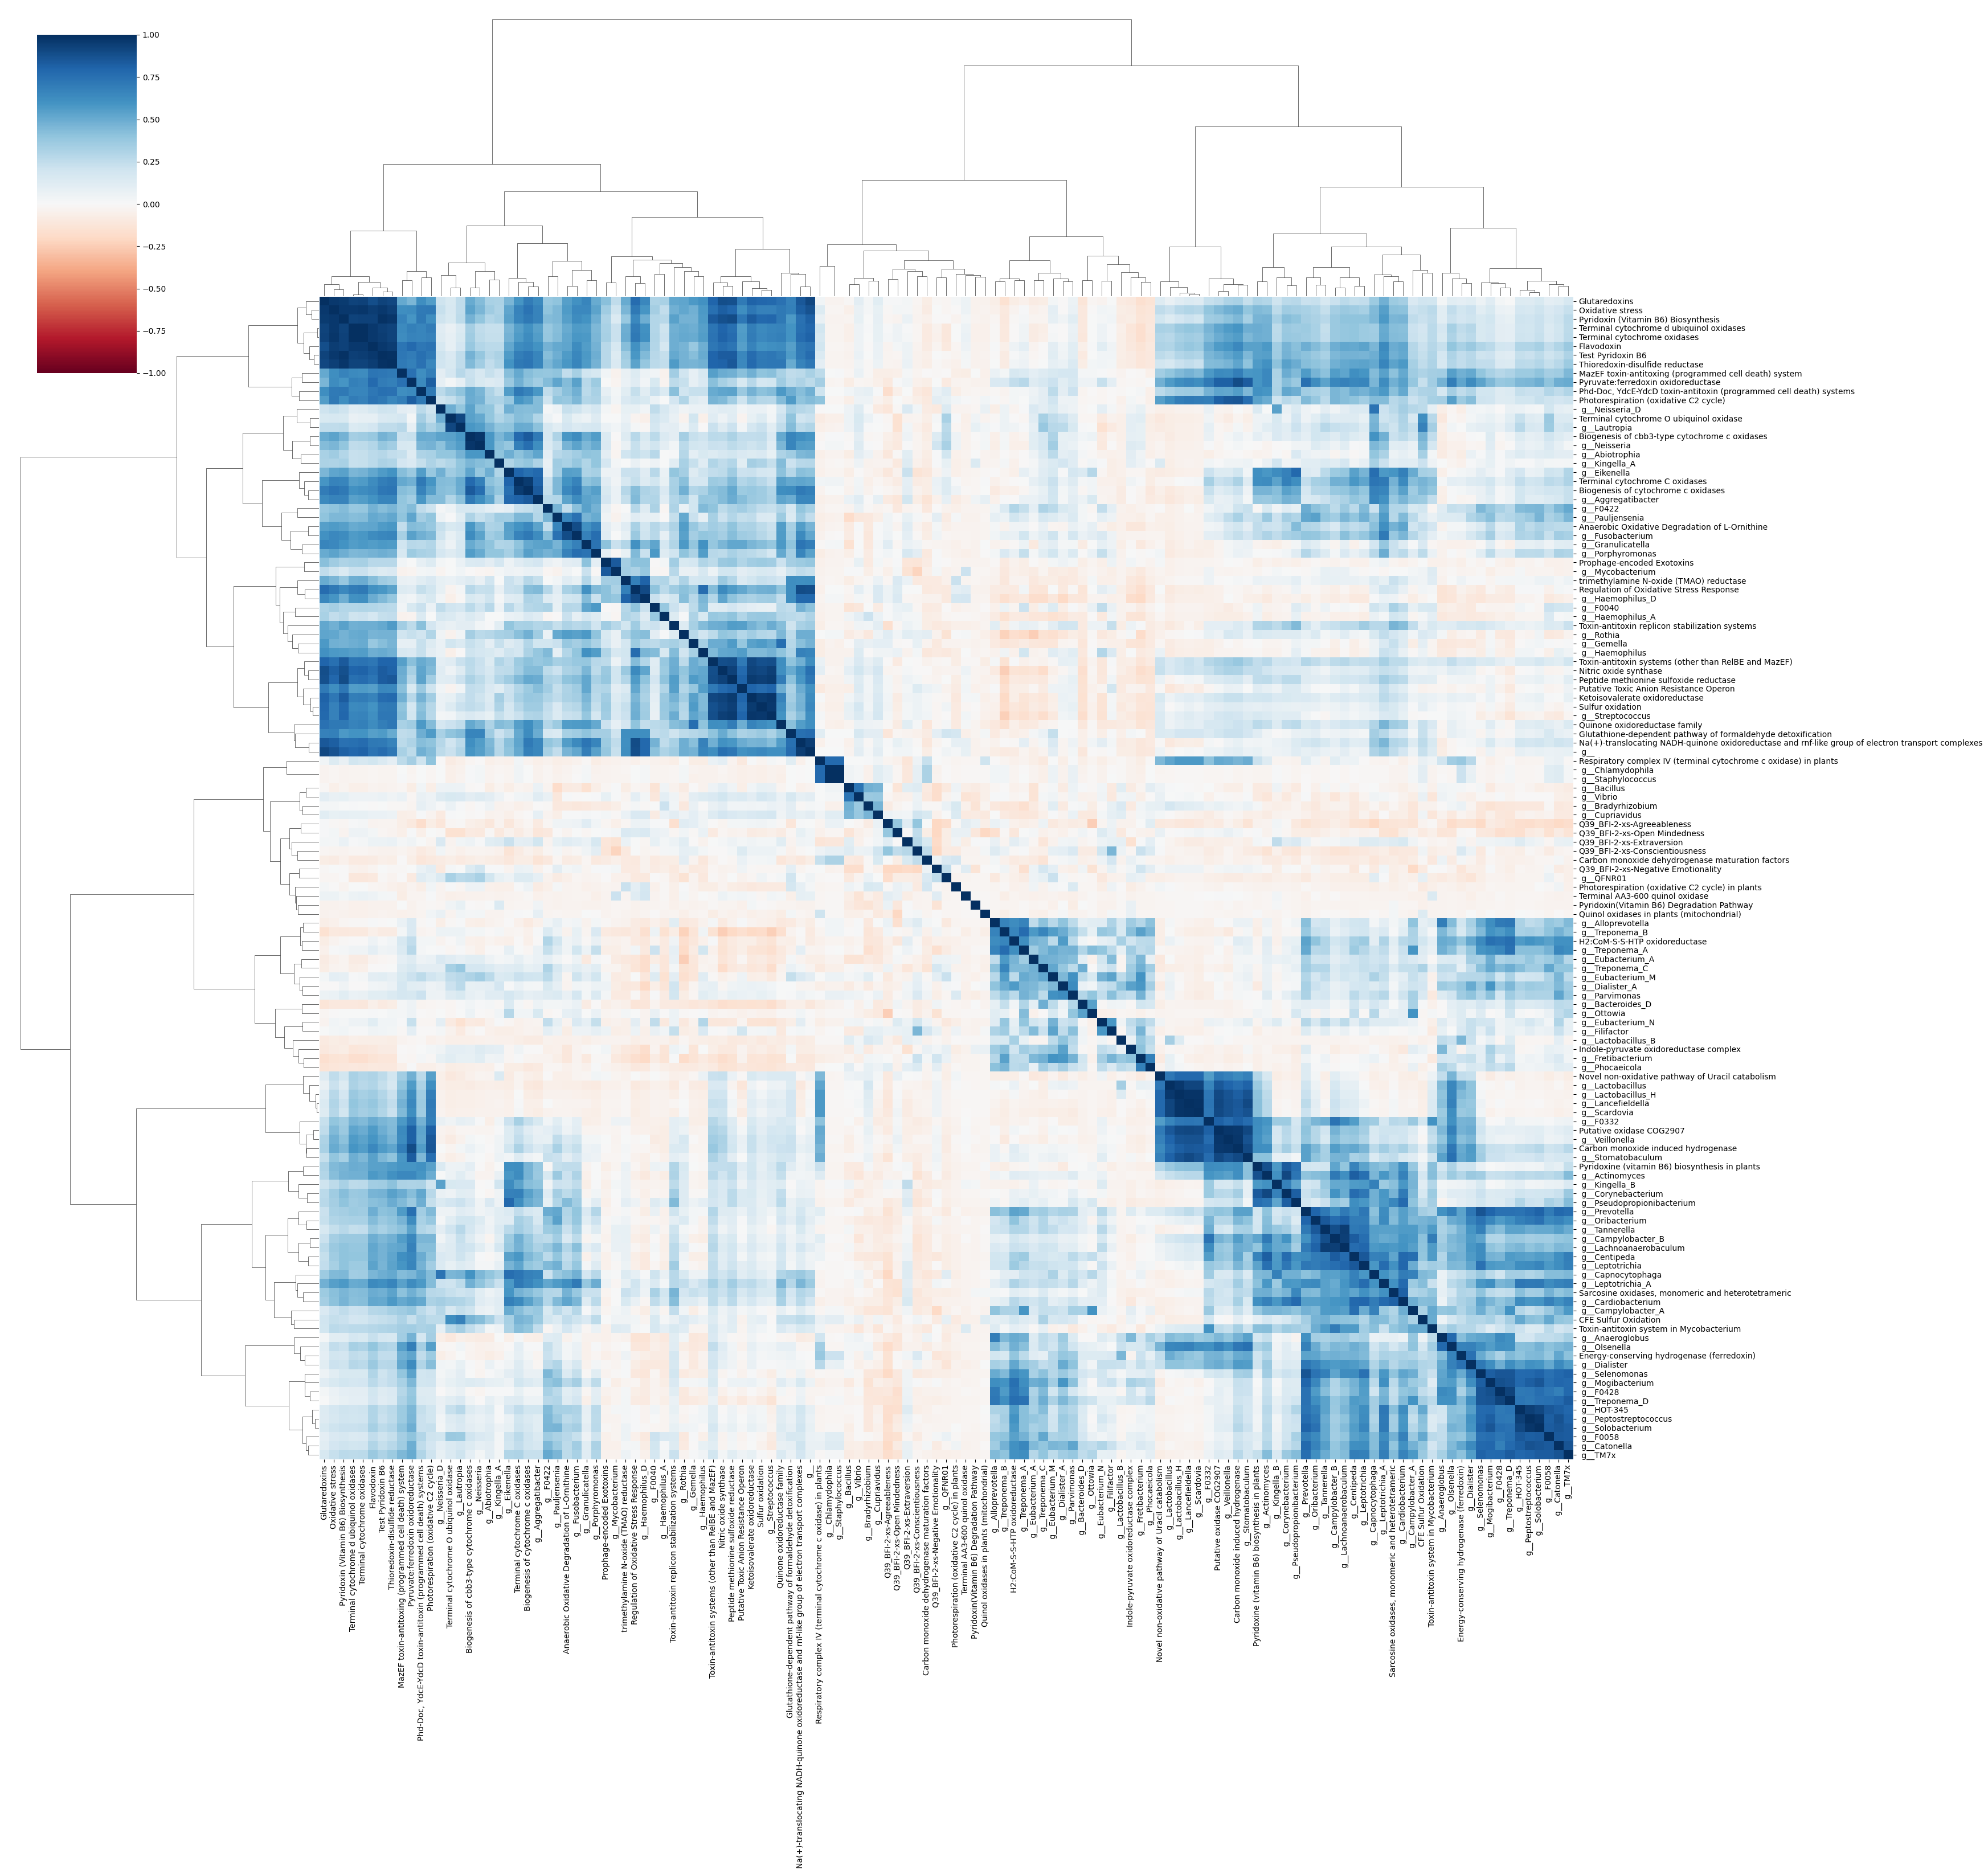

In [ ]:
sns.clustermap(correlations, method="ward", cmap='RdBu', annot=False,
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(35,33));

# CCA

In [ ]:
#dft1 for microbiome
#dmic for psychology and metabolism
dmic = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Psychological Traits and Metabolism Data.xlsx')
d_all = pd.concat([dft1,dmic],axis=1)
d_all

Unnamed: 0   g__   g__Abiotrophia   g__Actinomyces  \
0    S0046-0001_S22-taxa  2657              542            14410   
1    S0046-0002_S24-taxa   919                0              291   
2    S0046-0003_S23-taxa  4943                0            15751   
3    S0046-0004_S25-taxa  3059             1057              790   
4    S0046-0005_S26-taxa   749               19               22   
..                   ...   ...              ...              ...   
100  S0046-0108_S12-taxa  1451              114              918   
101  S0046-0111_S13-taxa  1437              553              694   
102  S0046-0112_S14-taxa  1722              167            16790   
103  S0046-0113_S15-taxa  1115                2              215   
104  S0046-0114_S16-taxa  1977              600             2603   

      g__Aggregatibacter   g__Alloprevotella   g__Anaeroglobus   g__Bacillus  \
0                   1242                   7                 6             0   
1                    288                  27                 3             0   
2                    268                 145                26            64   
3                    598                  73                35            47   
4                    167                  40                 1            30   
..                   ...                 ...               ...           ...   
100                  466                  98                 6            22   
101                  148                  17                22             0   
102                  487                3372              1305            31   
103                   82                  83                19            21   
104                  449                 258                50            57   

      g__Bacteroides_D   g__Bradyrhizobium  ...  \
0                    1                  13  ...   
1                    1                   7  ...   
2                   41                  12  ...   
3                   58                  18  ...   
4                    0                   8  ...   
..                 ...                 ...  ...   
100                  0                  11  ...   
101                  0                  11  ...   
102                  5                   4  ...   
103                  3                   2  ...   
104                106                  11  ...   

     Terminal cytochrome O ubiquinol oxidase  \
0                                   0.500000   
1                                   0.000000   
2                                   0.000000   
3                                   0.333333   
4                                   0.000000   
..                                       ...   
100                                 1.833333   
101                                 2.166667   
102                                 0.000000   
103                                 0.833333   
104                                 0.333333   

     Terminal cytochrome d ubiquinol oxidases  Terminal cytochrome oxidases  \
0                                   79.833333                     80.333333   
1                                   32.833333                     32.833333   
2                                  193.500000                    193.500000   
3                                  129.583333                    128.916667   
4                                   21.166667                     21.166667   
..                                        ...                           ...   
100                                 40.333333                     42.166667   
101                                 31.833333                     33.000000   
102                                120.250000                    119.250000   
103                                 48.416667                     49.250000   
104                                 66.666667                     67.000000   

     Test Pyridoxin B6  Thioredoxin-disulfide reductase  \
0            84.296825                

In [ ]:
d_all_s = d_all[d_all['Q12_IsSmoker']==1]
d_all_ns = d_all[d_all['Q12_IsSmoker']==2]

In [ ]:
np.mean(d_all_s[' g__Streptococcus'])

133878.0181818182

In [ ]:
np.mean(d_all_ns[' g__Streptococcus'])

114904.0

## CCA (option 1), not used

In [ ]:
X1=dft1.iloc[:,1:] #bacteria #17-38-3 #g__Cupriavidus,g__Haemophilus_D,g__Actinomyces
X2=dmic.iloc[:, 1:6] #psychology #5-4-1 #Open Mindedness,Negative Emotionality,Extraversion

In [ ]:
scaler = MinMaxScaler()
X1_sc = X1
X2_sc = X2
#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates


In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0             1             0             1
0  1.000000e+00 -1.401336e-15  9.414046e-01 -2.499922e-16
1 -1.401336e-15  1.000000e+00 -3.163344e-04  8.906546e-01
0  9.414046e-01 -3.163344e-04  1.000000e+00  3.161988e-16
1 -2.499922e-16  8.906546e-01  3.161988e-16  1.000000e+00

In [ ]:
# Compute canonical correlation coefficients
num_components = min(X1_c.shape[1], X2_c.shape[1])
canonical_correlations = np.corrcoef(X1_c[:, :num_components].T, X2_c[:, :num_components].T)

# Display the canonical correlation coefficients
print("Canonical Correlation Coefficients:", canonical_correlations)


Canonical Correlation Coefficients: [[ 1.00000000e+00 -1.41260565e-15  9.41404557e-01 -2.24608139e-16]
 [-1.41260565e-15  1.00000000e+00 -3.16334406e-04  8.90654558e-01]
 [ 9.41404557e-01 -3.16334406e-04  1.00000000e+00  2.67220840e-16]
 [-2.24608139e-16  8.90654558e-01  2.67220840e-16  1.00000000e+00]]


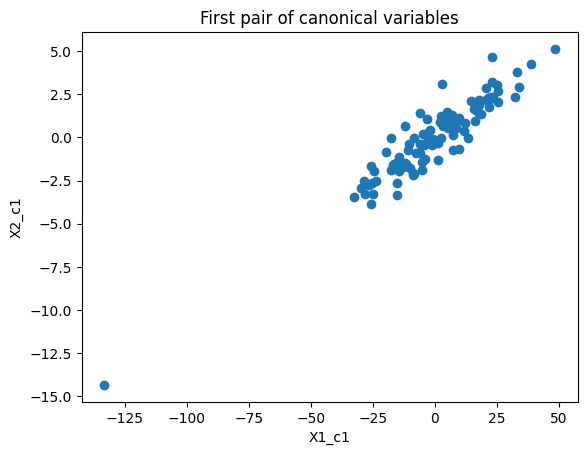

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

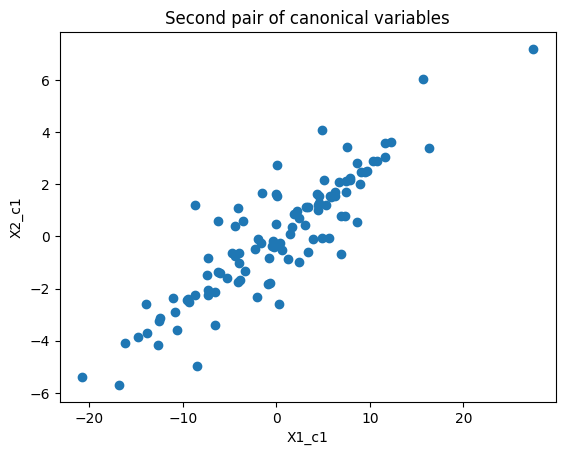

In [ ]:
plt.scatter(X1_c[:, 1],X2_c[:, 1])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('Second pair of canonical variables')
plt.show()

In [ ]:
x_load

0
0      0.939332
1     28.210754
2     43.681869
3      0.300215
4      0.037027
5     71.838251
6      4.858872
7    219.435182
8    315.258547
9     73.607659
10     0.152769
11     1.471461
12    85.643586
13     3.630624
14  1445.156564
15     0.842785
16     0.333386
17   432.335777
18   736.626211
19    26.076268
20    48.491264
21     1.162765
22     1.180269
23   255.743840
24    80.808472
25   151.704749
26     0.132171
27     7.376200
28   208.267468
29     0.000000
30    76.897144
31   186.088608
32     0.044252
33     0.961297
34    44.759061
35     0.000000
36   114.820290
37     5.136354
38   349.663234
39   338.537890
40   279.220643
41   146.134550
42    40.252915
43     0.139442
44   147.403186
45   108.946428

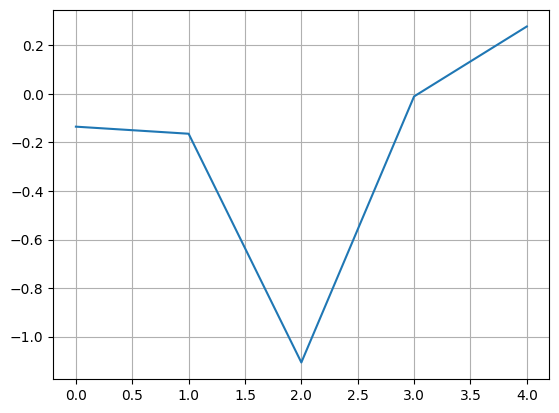

In [ ]:
y_load = cca.y_loadings_[:,0]
plt.plot(y_load)
plt.grid()

In [ ]:
X1_c = pd.DataFrame(X1_c[:,0])
X1_ssc = scaler.fit_transform(X1_c) #bacteria
X1_ssc = pd.DataFrame(X1_ssc)
X1_ssc

0
0    0.846125
1    0.772802
2    0.654644
3    0.860738
4    0.705555
..        ...
100  0.812591
101  0.687351
102  0.716632
103  0.666979
104  0.625712

[105 rows x 1 columns]

In [ ]:
X2_c = pd.DataFrame(X2_c[:,0])
X2_ssc = scaler.fit_transform(X2_c) #psychology
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0    0.883392
1    0.698153
2    0.638152
3    0.976878
4    0.638801
..        ...
100  0.846017
101  0.735160
102  0.720205
103  0.769789
104  0.693136

[105 rows x 1 columns]

In [ ]:
X1_c = pd.DataFrame(X1_c)
X1_c

0
0    20.560793
1     7.218895
2   -14.281286
3    23.219742
4    -5.017367
..         ...
100  14.458914
101  -8.329861
102  -3.001878
103 -12.036715
104 -19.545752

[105 rows x 1 columns]

In [ ]:
X2_c = pd.DataFrame(X2_c)
X2_c

0
0    2.859040
1   -0.746384
2   -1.914223
3    4.678608
4   -1.901581
..        ...
100  2.131573
101 -0.026090
102 -0.317175
103  0.647906
104 -0.844031

[105 rows x 1 columns]

In [ ]:
X1_c.describe()

0
count  1.050000e+02
mean  -6.767074e-16
std    2.135903e+01
min   -1.334009e+02
25%   -1.098348e+01
50%    4.738334e-01
75%    1.355235e+01
max    4.856007e+01

In [ ]:
X2_c.describe()

0
count  1.050000e+02
mean  -8.131062e-16
std    2.374708e+00
min   -1.433495e+01
25%   -1.452696e+00
50%   -2.608962e-02
75%    1.407934e+00
max    5.128645e+00

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

-11.744264852072606


In [ ]:
X1_c

0
0    20.560793
1     7.218895
2   -14.281286
3    23.219742
4    -5.017367
..         ...
100  14.458914
101  -8.329861
102  -3.001878
103 -12.036715
104 -19.545752

[105 rows x 1 columns]

### CCA 2

In [ ]:
X1=X1_c.iloc[:, 0] #bacteria
X2=dmic.iloc[:, 6:52] #metabolic #15-18-39 #MazEF toxin-antitoxing (programmed cell death) system, Oxidative stress, Terminal cytochrome d ubiquinol oxidases

In [ ]:
scaler = MinMaxScaler()
X1 = np.array(X1)
X1_sc = X1.reshape(-1, 1)
X2_sc = X2

#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=1 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0         0
0  1.000000  0.672184
0  0.672184  1.000000

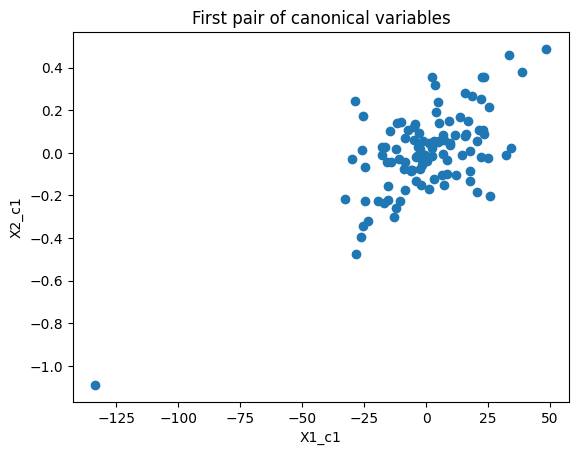

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

In [ ]:
#plt.scatter(X1_c[:, 1],X2_c[:, 1])
#plt.xlabel('X1_c1')
#plt.ylabel('X2_c1')
#plt.title('Second pair of canonical variables')
#plt.show()

In [ ]:
cca.x_loadings_

array([[1.]])

In [ ]:
cca.y_loadings_

array([[ 4.09972290e+00],
       [-8.91421904e+00],
       [ 1.02355266e+01],
       [-4.35297221e-01],
       [-2.26764743e-01],
       [ 1.01253879e+01],
       [-6.74974862e-01],
       [ 3.91232506e+01],
       [ 5.88248813e+01],
       [ 5.94847414e+00],
       [-6.45487223e-02],
       [-4.99251390e-02],
       [-1.50423410e+01],
       [-9.16971398e-01],
       [ 1.67789643e+02],
       [-1.29652729e-01],
       [ 8.78909299e-02],
       [ 8.13860950e+01],
       [-8.68918247e+01],
       [ 4.19300673e+00],
       [ 1.01833301e+01],
       [ 1.64853549e-01],
       [ 3.47883054e-01],
       [-9.48180602e+01],
       [ 1.61052914e+01],
       [ 3.26051266e+01],
       [-1.94581981e-02],
       [ 2.03385631e+00],
       [ 2.53354877e+01],
       [-5.01763592e-02],
       [-1.09404677e+01],
       [ 2.33032683e+01],
       [-1.19369937e+00],
       [ 2.47133506e-01],
       [-6.26640509e+00],
       [ 2.02081427e-02],
       [ 2.99200232e+01],
       [-1.01574042e+00],
       [ 6.7

In [ ]:
cca.x_loadings_

array([[1.]])

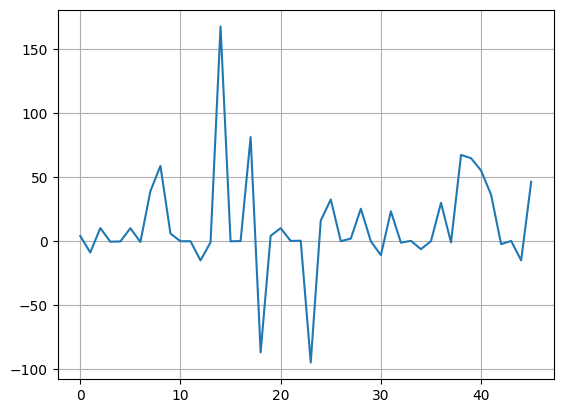

In [ ]:
yy_load = cca.y_loadings_[:,0]
plt.plot(yy_load)
plt.grid()

In [ ]:
yy_load = pd.DataFrame(yy_load)
yy_load

0
0     4.099723
1    -8.914219
2    10.235527
3    -0.435297
4    -0.226765
5    10.125388
6    -0.674975
7    39.123251
8    58.824881
9     5.948474
10   -0.064549
11   -0.049925
12  -15.042341
13   -0.916971
14  167.789643
15   -0.129653
16    0.087891
17   81.386095
18  -86.891825
19    4.193007
20   10.183330
21    0.164854
22    0.347883
23  -94.818060
24   16.105291
25   32.605127
26   -0.019458
27    2.033856
28   25.335488
29   -0.050176
30  -10.940468
31   23.303268
32   -1.193699
33    0.247134
34   -6.266405
35    0.020208
36   29.920023
37   -1.015740
38   67.394660
39   64.840764
40   55.201858
41   36.258919
42   -2.339220
43    0.163348
44  -14.995439
45   46.406724

In [ ]:
X1_c = pd.DataFrame(X1_c)
X1_c

0
0    20.560793
1     7.218895
2   -14.281286
3    23.219742
4    -5.017367
..         ...
100  14.458914
101  -8.329861
102  -3.001878
103 -12.036715
104 -19.545752

[105 rows x 1 columns]

In [ ]:
X2_c = pd.DataFrame(X2_c)
X2_ssc = scaler.fit_transform(X2_c) #metabolic
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0    0.573082
1    0.727498
2    0.662020
3    0.915344
4    0.768909
..        ...
100  0.684528
101  0.733822
102  0.750893
103  0.700747
104  0.547215

[105 rows x 1 columns]

In [ ]:
X1_c = pd.DataFrame(X1_c)
X1_c

0
0    20.560793
1     7.218895
2   -14.281286
3    23.219742
4    -5.017367
..         ...
100  14.458914
101  -8.329861
102  -3.001878
103 -12.036715
104 -19.545752

[105 rows x 1 columns]

In [ ]:
X2_c = pd.DataFrame(X2_c)
X2_c

0
0   -0.185361
1    0.058192
2   -0.045084
3    0.354475
4    0.123509
..        ...
100 -0.009581
101  0.068167
102  0.095093
103  0.015999
104 -0.226159

[105 rows x 1 columns]

In [ ]:
X1_c.describe()

0
count  1.050000e+02
mean  -2.368476e-16
std    2.135903e+01
min   -1.334009e+02
25%   -1.098348e+01
50%    4.738334e-01
75%    1.355235e+01
max    4.856007e+01

In [ ]:
X2_c.describe()

0
count  1.050000e+02
mean   2.437204e-16
std    2.060430e-01
min   -1.089258e+00
25%   -8.591154e-02
50%    1.040344e-02
75%    1.028307e-01
max    4.879982e-01

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

-171.5089774418997


## CCA (option 2), we used this

In [ ]:
X1=dmic.iloc[:, 6:52] #metabolic #19-26-37 #Peptide methionine sulfoxide reductase, Pyridoxin (Vitamin B6) Biosynthesis, Terminal cytochrome C oxidases
X2=dmic.iloc[:, 1:6] #psychology #1-4-3 #

In [ ]:
scaler = MinMaxScaler()
X1_sc = X1
X2_sc = X2
#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0             1             0             1
0  1.000000e+00  3.407174e-15  7.768940e-01  1.828162e-15
1  3.407174e-15  1.000000e+00  9.551347e-04  7.302138e-01
0  7.768940e-01  9.551347e-04  1.000000e+00 -4.803846e-17
1  1.828162e-15  7.302138e-01 -4.803846e-17  1.000000e+00

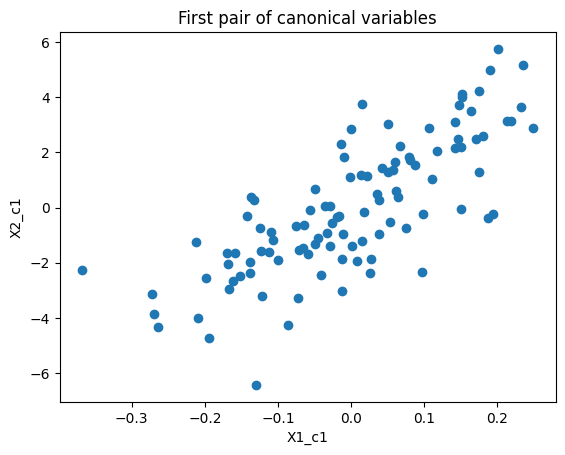

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

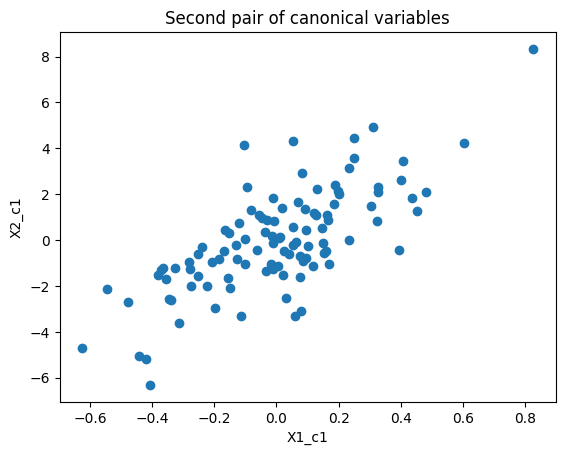

In [ ]:
plt.scatter(X1_c[:, 1],X2_c[:, 1])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('Second pair of canonical variables')
plt.show()

In [ ]:
x_load = cca.x_loadings_[:,0]
x_load = abs(x_load)
ind = ['Anaerobic Oxidative Degradation of L-Ornithine','Biogenesis of cbb3-type cytochrome c oxidases','Biogenesis of cytochrome c oxidases','CFE Sulfur Oxidation','Carbon monoxide dehydrogenase maturation factors','Carbon monoxide induced hydrogenase','Energy-conserving hydrogenase (ferredoxin)','Flavodoxin','Glutaredoxins','Glutathione-dependent pathway of formaldehyde detoxification','H2:CoM-S-S-HTP oxidoreductase','Indole-pyruvate oxidoreductase complexx','Ketoisovalerate oxidoreductase','MazEF toxin-antitoxing (programmed cell death) system','Na(+)-translocating NADH-quinone oxidoreductase & rnf-like group of electron transport complexes','Nitric oxide synthase','Novel non-oxidative pathway of Uracil catabolism','Oxidative stress','Peptide methionine sulfoxide reductase','Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed cell death) systems','Photorespiration (oxidative C2 cycle)','Photorespiration (oxidative C2 cycle) of plants','Prophage-encoded Exotoxins','Putative Toxic Anion Resistance Operon','Putative oxidase COG2907','Pyridoxin (Vitamin B6) Biosynthesis','Pyridoxin(Vitamin B6) Degradation Pathway','Pyridoxine (vitamin B6) biosynthesis of plants','Pyruvate:ferredoxin oxidoreductase','Quinol oxidases of plants (mitochondrial)','Quinone oxidoreductase family','Regulation of Oxidative Stress Response','Respiratory complexx IV (terminal cytochrome c oxidase) of plants','Sarcosine oxidases, monomeric & heterotetrameric','Sulfur oxidation','Terminal AA3-600 quinol oxidase','Terminal cytochrome C oxidases','Terminal cytochrome O ubiquinol oxidase','Terminal cytochrome d ubiquinol oxidases','Terminal cytochrome oxidases','Test Pyridoxin B6','Thioredoxin-disulfide reductase','Toxin-antitoxin replicon stabilization systems','Toxin-antitoxin system of Mycobacterium','Toxin-antitoxin systems (other than RelBE & MazEF)','trimethylamine N-oxide (TMAO) reductase']
#ind = np.arange(1,47)
x_load = pd.DataFrame(x_load)
ind = pd.DataFrame(ind)
x2_f = pd.concat([ind,x_load],axis=1)
x2_f.columns = ['Name', 'x2']



In [ ]:
x2_f

Name          x2
0      Anaerobic Oxidative Degradation of L-Ornithine   18.275288
1       Biogenesis of cbb3-type cytochrome c oxidases   61.460433
2                 Biogenesis of cytochrome c oxidases   39.598351
3                                CFE Sulfur Oxidation    0.112870
4    Carbon monoxide dehydrogenase maturation factors    0.191899
5                 Carbon monoxide induced hydrogenase    4.324218
6          Energy-conserving hydrogenase (ferredoxin)    0.031010
7                                          Flavodoxin   20.214850
8                                       Glutaredoxins   24.209085
9   Glutathione-dependent pathway of formaldehyde ...   11.051959
10                      H2:CoM-S-S-HTP oxidoreductase    0.226065
11            Indole-pyruvate oxidoreductase complexx    0.315110
12                     Ketoisovalerate oxidoreductase   12.243742
13  MazEF toxin-antitoxing (programmed cell death)...    3.933436
14  Na(+)-translocating NADH-quinone oxidoreductas...   82.798120
15                              Nitric oxide synthase    1.657005
16   Novel non-oxidative pathway of Uracil catabolism    0.059569
17                                   Oxidative stress   20.009271
18             Peptide methionine sulfoxide reductase  116.294686
19  Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed...   10.638673
20              Photorespiration (oxidative C2 cycle)    7.436101
21    Photorespiration (oxidative C2 cycle) of plants    0.007320
22                         Prophage-encoded Exotoxins    0.291563
23             Putative Toxic Anion Resistance Operon   26.363606
24                           Putative oxidase COG2907   10.712768
25                Pyridoxin (Vitamin B6) Biosynthesis  105.261411
26          Pyridoxin(Vitamin B6) Degradation Pathway    0.019702
27     Pyridoxine (vitamin B6) biosynthesis of plants    0.961148
28                 Pyruvate:ferredoxin oxidoreductase   21.623324
29          Quinol oxidases of plants (mitochondrial)    0.121673
30                      Quinone oxidoreductase family   29.735933
31            Regulation of Oxidative Stress Response   44.811285
32  Respiratory complexx IV (terminal cytochrome c...    1.167571
33   Sarcosine oxidases, monomeric & heterotetrameric    1.278311
34                                   Sulfur oxidation    4.084441
35                    Terminal AA3-600 quinol oxidase    0.020823
36                     Terminal cytochrome C oxidases  105.222597
37            Terminal cytochrome O ubiquinol oxidase    1.219291
38           Terminal cytochrome d ubiquinol oxidases   49.376354
39                       Terminal cytochrome oxidases   47.676094
40                                  Test Pyridoxin B6   90.288097
41                    Thioredoxin-disulfide reductase   95.816001
42     Toxin-antitoxin replicon stabilization systems    3.593410
43            Toxin-antitoxin system of Mycobacterium    0.089242
44  Toxin-antitoxin systems (other than RelBE & Ma...   21.036213
45            trimethylamine N-oxide (TMAO) reductase   18.165829

In [ ]:
# Sorting by column 'x2'
x2_f_s = x2_f.sort_values(by=['x2'], ascending=False)
x2_f_s

Name          x2
18             Peptide methionine sulfoxide reductase  116.294686
25                Pyridoxin (Vitamin B6) Biosynthesis  105.261411
36                     Terminal cytochrome C oxidases  105.222597
41                    Thioredoxin-disulfide reductase   95.816001
40                                  Test Pyridoxin B6   90.288097
14  Na(+)-translocating NADH-quinone oxidoreductas...   82.798120
1       Biogenesis of cbb3-type cytochrome c oxidases   61.460433
38           Terminal cytochrome d ubiquinol oxidases   49.376354
39                       Terminal cytochrome oxidases   47.676094
31            Regulation of Oxidative Stress Response   44.811285
2                 Biogenesis of cytochrome c oxidases   39.598351
30                      Quinone oxidoreductase family   29.735933
23             Putative Toxic Anion Resistance Operon   26.363606
8                                       Glutaredoxins   24.209085
28                 Pyruvate:ferredoxin oxidoreductase   21.623324
44  Toxin-antitoxin systems (other than RelBE & Ma...   21.036213
7                                          Flavodoxin   20.214850
17                                   Oxidative stress   20.009271
0      Anaerobic Oxidative Degradation of L-Ornithine   18.275288
45            trimethylamine N-oxide (TMAO) reductase   18.165829
12                     Ketoisovalerate oxidoreductase   12.243742
9   Glutathione-dependent pathway of formaldehyde ...   11.051959
24                           Putative oxidase COG2907   10.712768
19  Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed...   10.638673
20              Photorespiration (oxidative C2 cycle)    7.436101
5                 Carbon monoxide induced hydrogenase    4.324218
34                                   Sulfur oxidation    4.084441
13  MazEF toxin-antitoxing (programmed cell death)...    3.933436
42     Toxin-antitoxin replicon stabilization systems    3.593410
15                              Nitric oxide synthase    1.657005
33   Sarcosine oxidases, monomeric & heterotetrameric    1.278311
37            Terminal cytochrome O ubiquinol oxidase    1.219291
32  Respiratory complexx IV (terminal cytochrome c...    1.167571
27     Pyridoxine (vitamin B6) biosynthesis of plants    0.961148
11            Indole-pyruvate oxidoreductase complexx    0.315110
22                         Prophage-encoded Exotoxins    0.291563
10                      H2:CoM-S-S-HTP oxidoreductase    0.226065
4    Carbon monoxide dehydrogenase maturation factors    0.191899
29          Quinol oxidases of plants (mitochondrial)    0.121673
3                                CFE Sulfur Oxidation    0.112870
43            Toxin-antitoxin system of Mycobacterium    0.089242
16   Novel non-oxidative pathway of Uracil catabolism    0.059569
6          Energy-conserving hydrogenase (ferredoxin)    0.031010
35                    Terminal AA3-600 quinol oxidase    0.020823
26          Pyridoxin(Vitamin B6) Degradation Pathway    0.019702
21    Photorespiration (oxidative C2 cycle) of plants    0.007320

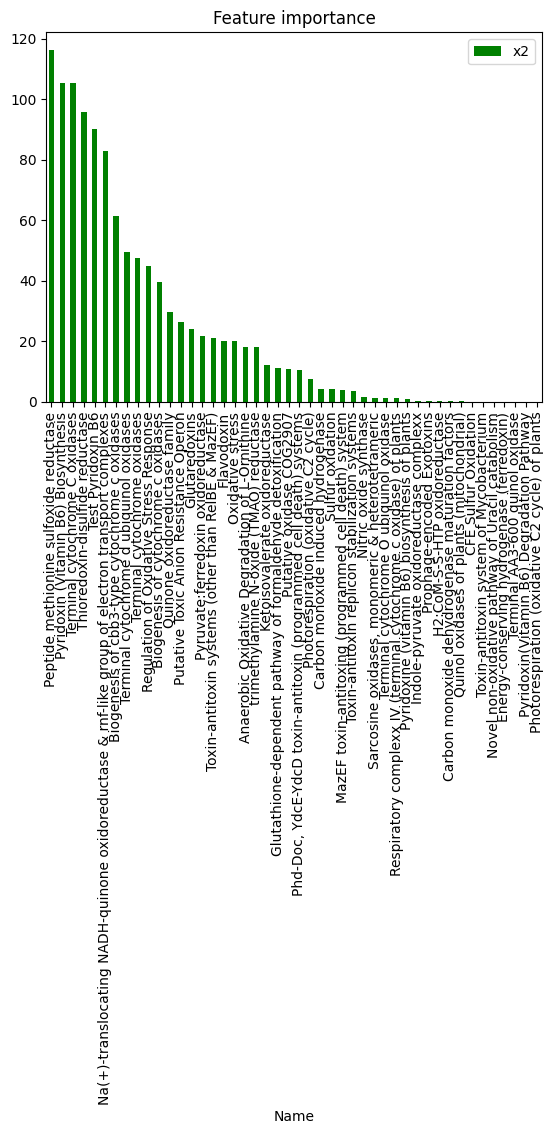

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x2_f_s.plot(kind='bar',
        x='Name',
        y='x2',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[116.3, 105.3, 105.2, 95.8, 90.3, 82.8, 61.5, 49.4, 47.7, 44.8],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x2_f_s.iloc[0:10,0]))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Sample DataFrame for demonstration
df = pd.DataFrame(dict(
    r=[116.3, 105.3, 105.2, 95.8, 90.3, 82.8, 61.5, 49.4, 47.7, 44.8],
    theta=x2_f_s.iloc[0:10,0]))

fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')

# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)

fig.show()

In [ ]:
#x_load

In [ ]:
y_load = cca.y_loadings_[:,0]
y_load = abs(y_load)
ind1 = ['Extraversion', 'Agreableness','Conscientiousness','Negative Emotionality','Open Mindedness']
y_load = pd.DataFrame(y_load)
ind1 = pd.DataFrame(ind1)
x1_f = pd.concat([ind1,y_load],axis=1)
x1_f.columns = ['Name', 'x1']
# Sorting by column 'x1'
x1_f_s = x1_f.sort_values(by=['x1'], ascending=False)
x1_f_s

Name        x1
4        Open Mindedness  0.625921
0           Extraversion  0.568343
3  Negative Emotionality  0.459763
1           Agreableness  0.375391
2      Conscientiousness  0.249038

In [ ]:
x1_f

Name        x1
0           Extraversion  0.568343
1           Agreableness  0.375391
2      Conscientiousness  0.249038
3  Negative Emotionality  0.459763
4        Open Mindedness  0.625921

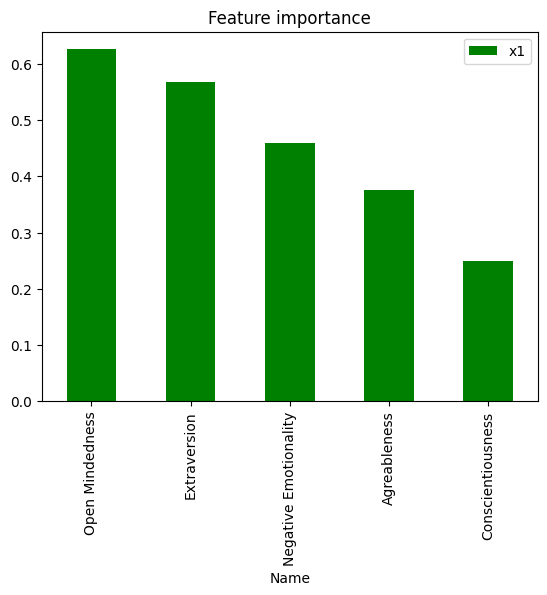

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x1_f_s.plot(kind='bar',
        x='Name',
        y='x1',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[0.625921,0.568343, 0.459763, 0.375391,0.249038 ],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x1_f_s['Name']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[0.625921,0.568343, 0.459763, 0.375391,0.249038 ],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x1_f_s['Name']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')

# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)

fig.show()

In [ ]:
X1_c = pd.DataFrame(X1_c[:,0])
X1_ssc = scaler.fit_transform(X1_c) #metabolic
X1_ssc = pd.DataFrame(X1_ssc)
X1_ssc

0
0    0.887991
1    0.610097
2    0.677497
3    0.631169
4    0.490322
..        ...
100  0.321409
101  0.505032
102  0.826684
103  0.617836
104  0.677440

[105 rows x 1 columns]

In [ ]:
X1_ssc.describe()

0
count  105.000000
mean     0.596249
std      0.212828
min      0.000000
25%      0.433540
50%      0.596847
75%      0.753251
max      1.000000

In [ ]:
X2_c = pd.DataFrame(X2_c[:,0])
X2_ssc = scaler.fit_transform(X2_c) #psychology
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0    0.739563
1    0.368780
2    0.776445
3    0.621337
4    0.407481
..        ...
100  0.393407
101  0.520179
102  0.783772
103  0.624886
104  0.632594

[105 rows x 1 columns]

In [ ]:
X2_ssc.describe()

0
count  105.000000
mean     0.527930
std      0.198858
min      0.000000
25%      0.393407
50%      0.503119
75%      0.678841
max      1.000000

In [ ]:
X1_c.describe()

0
count  1.050000e+02
mean  -7.419991e-16
std    1.312197e-01
min   -3.676190e-01
25%   -1.003189e-01
50%    3.688575e-04
75%    9.680005e-02
max    2.489337e-01

In [ ]:
X2_c.describe()

0
count  1.050000e+02
mean  -2.643388e-16
std    2.422384e+00
min   -6.430962e+00
25%   -1.638688e+00
50%   -3.022323e-01
75%    1.838307e+00
max    5.750497e+00

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

0.043394288447650295


### CCA 2

In [ ]:
X1=X1_c.iloc[:, 0] #metabolic
X2=dft1.iloc[:,1:] #bacteria #17-51-70 #g__Corynebacterium, g__Kingella_A, g__Haemophilus_D, g__Neisseria, g__Streptococcus

In [ ]:
scaler = MinMaxScaler()
X1 = np.array(X1)
X1_sc = X1.reshape(-1, 1)
X2_sc = X2

#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=1 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0         0
0  1.000000  0.899523
0  0.899523  1.000000

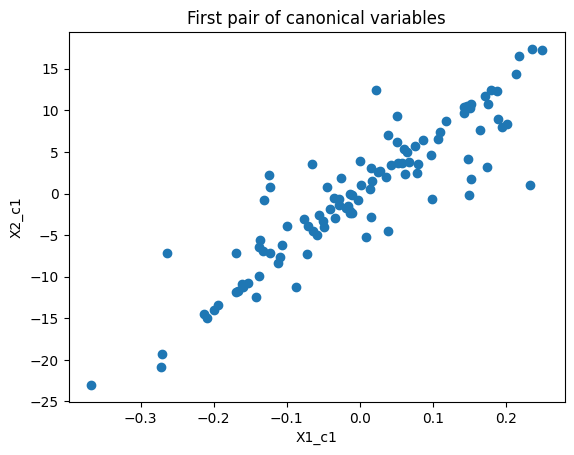

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

In [ ]:
#plt.scatter(X1_c[:, 1],X2_c[:, 1])
#plt.xlabel('X1_c1')
#plt.ylabel('X2_c1')
#plt.title('Second pair of canonical variables')
#plt.show()

In [ ]:
cca.x_loadings_

array([[1.]])

In [ ]:
#yy_load = cca.y_loadings_[:,0]
#plt.plot(yy_load)
#plt.grid()


In [ ]:
yy_load = cca.y_loadings_[:,0]
yy_load = abs(yy_load)
ind3 = dft.columns
yy_load = pd.DataFrame(yy_load)
ind3 = pd.DataFrame(ind3)
x3_f = pd.concat([ind3,yy_load],axis=1)
x3_f.columns = ['Name', 'x3']
# Sorting by column 'x1'
x3_f_s = x3_f.sort_values(by=['x3'], ascending=False)
x3_f_s

Name          x3
37     g__Haemophilus_D  742.111141
16   g__Corynebacterium  728.729107
69     g__Streptococcus  645.011494
50         g__Neisseria  632.932782
76       g__Veillonella  320.154508
..                  ...         ...
58       g__Phocaeicola    0.117845
21     g__Eubacterium_A    0.035249
8     g__Bradyrhizobium    0.030804
77            g__Vibrio    0.023404
7      g__Bacteroides_D    0.009403

[78 rows x 2 columns]

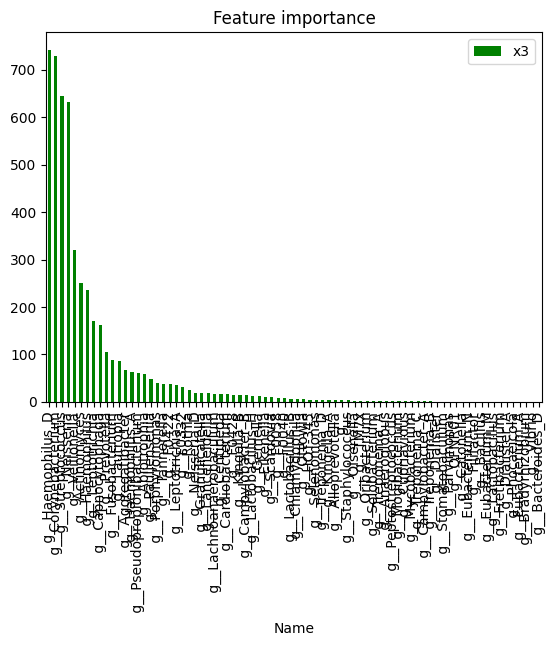

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x3_f_s.plot(kind='bar',
        x='Name',
        y='x3',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[742.1, 728.7, 645, 632.9, 320.2, 250.9, 235.9, 171.2, 162.5, 105.2],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x3_f_s.iloc[0:10,0]))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)

fig.show()

In [ ]:
yy_load = pd.DataFrame(yy_load)
yy_load

0
0     3.196176
1    59.299767
2   250.878496
3    68.017769
4     3.315008
..         ...
73    0.766595
74    0.877401
75    4.041580
76  320.154508
77    0.023404

[78 rows x 1 columns]

In [ ]:
X1_c = pd.DataFrame(X1_c)
X1_c

0
0    0.179874
1    0.008538
2    0.050094
3    0.021530
4   -0.065309
..        ...
100 -0.169453
101 -0.056240
102  0.142075
103  0.013309
104  0.050058

[105 rows x 1 columns]

In [ ]:
X2_c = pd.DataFrame(X2_c)
X2_ssc = scaler.fit_transform(X2_c) #bacteria
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0    0.877965
1    0.440332
2    0.722168
3    0.877793
4    0.657347
..        ...
100  0.391257
101  0.507166
102  0.808300
103  0.583312
104  0.800822

[105 rows x 1 columns]

In [ ]:
X2_ssc.describe()

0
count  105.000000
mean     0.569648
std      0.205065
min      0.000000
25%      0.446537
50%      0.583312
75%      0.702828
max      1.000000

In [ ]:
X1_c.describe()

0
count  1.050000e+02
mean   4.692014e-18
std    1.312197e-01
min   -3.676190e-01
25%   -1.003189e-01
50%    3.688575e-04
75%    9.680005e-02
max    2.489337e-01

In [ ]:
X2_c.describe()

0
count  1.050000e+02
mean  -1.691768e-15
std    8.285850e+00
min   -2.301720e+01
25%   -4.974415e+00
50%    5.521245e-01
75%    5.381284e+00
max    1.738883e+01

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

0.0004240411416368849


## CCA (option 2) for smokers

In [ ]:
x12 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Psychological Traits and Metabolism Data.xlsx')
#Xx = pd.concat([dmic, x12['Q12_IsSmoker']],axis=1)
#Xx
x12

SampleID  Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0    S0046-0001                         10                          11   
1    S0046-0002                         12                          14   
2    S0046-0003                         11                          13   
3    S0046-0004                          8                          10   
4    S0046-0005                          9                          13   
..          ...                        ...                         ...   
100  S0046-0108                          7                           9   
101  S0046-0111                          7                          10   
102  S0046-0112                         11                          12   
103  S0046-0113                          9                           9   
104  S0046-0114                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  ...  \
0                              18.166667                   0.0  ...   
1                               2.000000                   0.0  ...   
2                               5.750000                   0.0  ...   
3                               6.750000                   0.0  ...   
4                               2.000000                   0.0  ...   
..                                  

In [ ]:
# Find indices where 'Q12_IsSmoker' is 1
dmics = x12[x12['Q12_IsSmoker']==1]

In [ ]:
dmics = dmics.drop(columns = 'Q12_IsSmoker')
dmics

SampleID  Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
3    S0046-0004                          8                          10   
35   S0046-0036                         12                           9   
36   S0046-0037                         15                          14   
37   S0046-0040                          9                          12   
38   S0046-0041                         10                          13   
39   S0046-0042                         10                          13   
40   S0046-0044                          6                          10   
41   S0046-0046                          9                           9   
42   S0046-0047                         10                          13   
43   S0046-0048                          9                          13   
44   S0046-0050                          8                          11   
45   S0046-0051                         10                          15   
46   S0046-0052                         10                          10   
47   S0046-0053                          8                           9   
48   S0046-0054                         10                          13   
49   S0046-0055                         11                          13   
50   S0046-0056                          8                          15   
51   S0046-0057                          7                          13   
52   S0046-0058                         15                          14   
53   S0046-0059                         10                          12   
54   S0046-0060                         11                           8   
55   S0046-0061                         11                          10   
56   S0046-0063                          6                          12   
57   S0046-0064                          6                          10   
58   S0046-0065                          8                          10   
59   S0046-0066                          7                          13   
60   S0046-0067                         11                           8   
61   S0046-0068                         11                          14   
62   S0046-0069                         14                          10   
63   S0046-0070                         11                          10   
64   S0046-0071                         12                          12   
65   S0046-0072                         10                          10   
68   S0046-0075                         12                          10   
72   S0046-0079                          4                          13   
73   S0046-0080                         13                          12   
74   S0046-0081                         12                          15   
75   S0046-0082                          8                           6   
76   S0046-0083                          7                          11   
77   S0046-0085                         11                          14   
78   S0046-0086                          3                          12   
79   S0046-0087                         12                          15   
80   S0046-0088                         12                          13   
81   S0046-0089                         10                          10   
90   S0046-0098                          9                          10   
91   S0046-0099                         11                          15   
92   S0046-0100                          8                          14   
93   S0046-0101                         10                          14   
94   S0046-0102                         11                          11   
95   S0046-0103                         13                          11   
96   S0046-0104                         15                          11   
97   S0046-0105                          9                           8   
101  S0046-0111                          7                          10   
102  S0046-0112                         11                          12   
103  S0046-

In [ ]:
X1=dmics.iloc[:, 6:52] #metabolic #19-26-37 #Peptide methionine sulfoxide reductase, Pyridoxin (Vitamin B6) Biosynthesis, Terminal cytochrome C oxidases
X2=dmics.iloc[:, 1:6] #psychology #1-4-3 #

In [ ]:
scaler = MinMaxScaler()
X1_sc = X1
X2_sc = X2
#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0             1             0             1
0  1.000000e+00  2.860248e-15  9.933378e-01  1.969281e-15
1  2.860248e-15  1.000000e+00  3.585799e-04  9.517248e-01
0  9.933378e-01  3.585799e-04  1.000000e+00  9.868786e-17
1  1.969281e-15  9.517248e-01  9.868786e-17  1.000000e+00

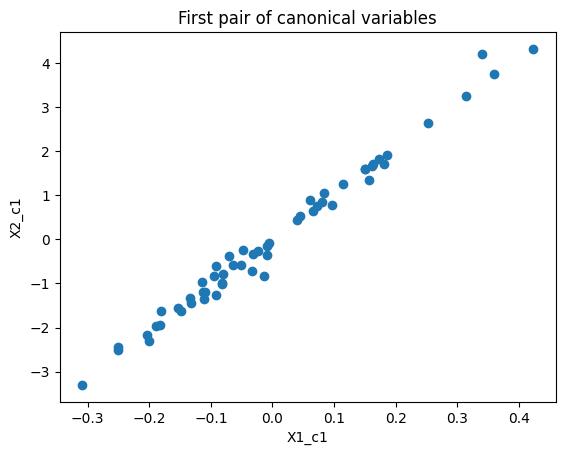

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

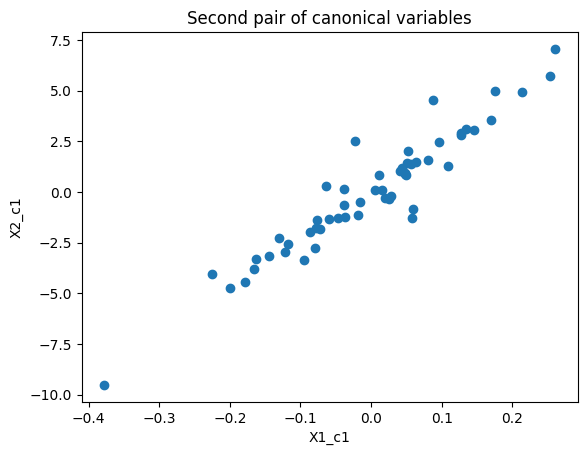

In [ ]:
plt.scatter(X1_c[:, 1],X2_c[:, 1])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('Second pair of canonical variables')
plt.show()

In [ ]:
x_load = cca.x_loadings_[:,0]
x_load = abs(x_load)
ind = ['Anaerobic Oxidative Degradation of L-Ornithine','Biogenesis of cbb3-type cytochrome c oxidases','Biogenesis of cytochrome c oxidases','CFE Sulfur Oxidation','Carbon monoxide dehydrogenase maturation factors','Carbon monoxide induced hydrogenase','Energy-conserving hydrogenase (ferredoxin)','Flavodoxin','Glutaredoxins','Glutathione-dependent pathway of formaldehyde detoxification','H2:CoM-S-S-HTP oxidoreductase','Indole-pyruvate oxidoreductase complexx','Ketoisovalerate oxidoreductase','MazEF toxin-antitoxing (programmed cell death) system','Na(+)-translocating NADH-quinone oxidoreductase & rnf-like group of electron transport complexes','Nitric oxide synthase','Novel non-oxidative pathway of Uracil catabolism','Oxidative stress','Peptide methionine sulfoxide reductase','Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed cell death) systems','Photorespiration (oxidative C2 cycle)','Photorespiration (oxidative C2 cycle) of plants','Prophage-encoded Exotoxins','Putative Toxic Anion Resistance Operon','Putative oxidase COG2907','Pyridoxin (Vitamin B6) Biosynthesis','Pyridoxin(Vitamin B6) Degradation Pathway','Pyridoxine (vitamin B6) biosynthesis of plants','Pyruvate:ferredoxin oxidoreductase','Quinol oxidases of plants (mitochondrial)','Quinone oxidoreductase family','Regulation of Oxidative Stress Response','Respiratory complexx IV (terminal cytochrome c oxidase) of plants','Sarcosine oxidases, monomeric & heterotetrameric','Sulfur oxidation','Terminal AA3-600 quinol oxidase','Terminal cytochrome C oxidases','Terminal cytochrome O ubiquinol oxidase','Terminal cytochrome d ubiquinol oxidases','Terminal cytochrome oxidases','Test Pyridoxin B6','Thioredoxin-disulfide reductase','Toxin-antitoxin replicon stabilization systems','Toxin-antitoxin system of Mycobacterium','Toxin-antitoxin systems (other than RelBE & MazEF)','trimethylamine N-oxide (TMAO) reductase']
#ind = np.arange(1,47)
x_load = pd.DataFrame(x_load)
ind = pd.DataFrame(ind)
x2_f = pd.concat([ind,x_load],axis=1)
x2_f.columns = ['Name', 'x2']



In [ ]:
x2_f

Name         x2
0      Anaerobic Oxidative Degradation of L-Ornithine  15.486407
1       Biogenesis of cbb3-type cytochrome c oxidases  38.119690
2                 Biogenesis of cytochrome c oxidases  25.744555
3                                CFE Sulfur Oxidation   0.311094
4    Carbon monoxide dehydrogenase maturation factors   0.059236
5                 Carbon monoxide induced hydrogenase  23.903894
6          Energy-conserving hydrogenase (ferredoxin)   0.899701
7                                          Flavodoxin  36.867611
8                                       Glutaredoxins  10.579764
9   Glutathione-dependent pathway of formaldehyde ...   7.032983
10                      H2:CoM-S-S-HTP oxidoreductase   0.165708
11            Indole-pyruvate oxidoreductase complexx   0.512889
12                     Ketoisovalerate oxidoreductase   0.923242
13  MazEF toxin-antitoxing (programmed cell death)...   3.641368
14  Na(+)-translocating NADH-quinone oxidoreductas...  18.685141
15                              Nitric oxide synthase   4.284798
16   Novel non-oxidative pathway of Uracil catabolism   0.289715
17                                   Oxidative stress  51.617510
18             Peptide methionine sulfoxide reductase  13.128942
19  Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed...   5.351026
20              Photorespiration (oxidative C2 cycle)  13.768427
21    Photorespiration (oxidative C2 cycle) of plants   0.059456
22                         Prophage-encoded Exotoxins   0.240727
23             Putative Toxic Anion Resistance Operon  51.040304
24                           Putative oxidase COG2907  34.776776
25                Pyridoxin (Vitamin B6) Biosynthesis  17.123899
26          Pyridoxin(Vitamin B6) Degradation Pathway   0.000000
27     Pyridoxine (vitamin B6) biosynthesis of plants   0.910519
28                 Pyruvate:ferredoxin oxidoreductase  36.390564
29          Quinol oxidases of plants (mitochondrial)   0.112066
30                      Quinone oxidoreductase family  19.881075
31            Regulation of Oxidative Stress Response   7.374812
32  Respiratory complexx IV (terminal cytochrome c...   1.125465
33   Sarcosine oxidases, monomeric & heterotetrameric   0.565785
34                                   Sulfur oxidation   1.122538
35                    Terminal AA3-600 quinol oxidase   0.018509
36                     Terminal cytochrome C oxidases  72.140202
37            Terminal cytochrome O ubiquinol oxidase   0.582168
38           Terminal cytochrome d ubiquinol oxidases  67.482581
39                       Terminal cytochrome oxidases  59.585006
40                                  Test Pyridoxin B6   1.775418
41                    Thioredoxin-disulfide reductase  21.366963
42     Toxin-antitoxin replicon stabilization systems   6.790356
43            Toxin-antitoxin system of Mycobacterium   0.096336
44  Toxin-antitoxin systems (other than RelBE & Ma...   0.471686
45            trimethylamine N-oxide (TMAO) reductase  19.782972

In [ ]:
# Sorting by column 'x2'
x2_f_s = x2_f.sort_values(by=['x2'], ascending=False)
x2_f_s

Name         x2
36                     Terminal cytochrome C oxidases  72.140202
38           Terminal cytochrome d ubiquinol oxidases  67.482581
39                       Terminal cytochrome oxidases  59.585006
17                                   Oxidative stress  51.617510
23             Putative Toxic Anion Resistance Operon  51.040304
1       Biogenesis of cbb3-type cytochrome c oxidases  38.119690
7                                          Flavodoxin  36.867611
28                 Pyruvate:ferredoxin oxidoreductase  36.390564
24                           Putative oxidase COG2907  34.776776
2                 Biogenesis of cytochrome c oxidases  25.744555
5                 Carbon monoxide induced hydrogenase  23.903894
41                    Thioredoxin-disulfide reductase  21.366963
30                      Quinone oxidoreductase family  19.881075
45            trimethylamine N-oxide (TMAO) reductase  19.782972
14  Na(+)-translocating NADH-quinone oxidoreductas...  18.685141
25                Pyridoxin (Vitamin B6) Biosynthesis  17.123899
0      Anaerobic Oxidative Degradation of L-Ornithine  15.486407
20              Photorespiration (oxidative C2 cycle)  13.768427
18             Peptide methionine sulfoxide reductase  13.128942
8                                       Glutaredoxins  10.579764
31            Regulation of Oxidative Stress Response   7.374812
9   Glutathione-dependent pathway of formaldehyde ...   7.032983
42     Toxin-antitoxin replicon stabilization systems   6.790356
19  Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed...   5.351026
15                              Nitric oxide synthase   4.284798
13  MazEF toxin-antitoxing (programmed cell death)...   3.641368
40                                  Test Pyridoxin B6   1.775418
32  Respiratory complexx IV (terminal cytochrome c...   1.125465
34                                   Sulfur oxidation   1.122538
12                     Ketoisovalerate oxidoreductase   0.923242
27     Pyridoxine (vitamin B6) biosynthesis of plants   0.910519
6          Energy-conserving hydrogenase (ferredoxin)   0.899701
37            Terminal cytochrome O ubiquinol oxidase   0.582168
33   Sarcosine oxidases, monomeric & heterotetrameric   0.565785
11            Indole-pyruvate oxidoreductase complexx   0.512889
44  Toxin-antitoxin systems (other than RelBE & Ma...   0.471686
3                                CFE Sulfur Oxidation   0.311094
16   Novel non-oxidative pathway of Uracil catabolism   0.289715
22                         Prophage-encoded Exotoxins   0.240727
10                      H2:CoM-S-S-HTP oxidoreductase   0.165708
29          Quinol oxidases of plants (mitochondrial)   0.112066
43            Toxin-antitoxin system of Mycobacterium   0.096336
21    Photorespiration (oxidative C2 cycle) of plants   0.059456
4    Carbon monoxide dehydrogenase maturation factors   0.059236
35                    Terminal AA3-600 quinol oxidase   0.018509
26          Pyridoxin(Vitamin B6) Degradation Pathway   0.000000

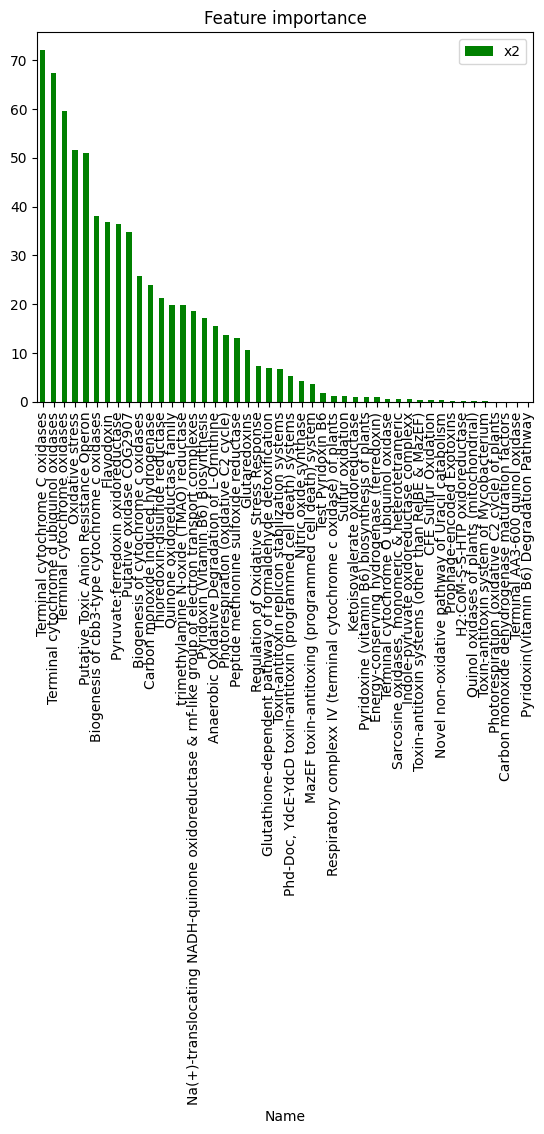

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x2_f_s.plot(kind='bar',
        x='Name',
        y='x2',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[72.140202,67.482581,59.585006,51.617510,51.040304,38.119690,36.867611,36.390564,34.776776,25.744555],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x2_f_s.iloc[0:10,0]))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)
fig.show()



In [ ]:
import plotly.graph_objects as go

categories = ['Terminal cytochrome d ubiquinol oxidases','Terminal cytochrome oxidases','Oxidative stress']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[67,	59,51],
      #r=[67.482581,	59.585006,51.617510],
      theta=categories,
      fill='toself',
      name='Smoker'
))
fig.add_trace(go.Scatterpolar(
      #r=[349.663234,338.537890,432.335777],
      r=[49,38,32],
      theta=categories,
      fill='toself',
      name='Non-smoker'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()


In [ ]:
import plotly.graph_objects as go

categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[100, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

In [ ]:
y_load = cca.y_loadings_[:,0]
y_load = abs(y_load)
ind1 = ['Extraversion', 'Agreableness','Conscientiousness','Negative Emotionality','Open Mindedness']
y_load = pd.DataFrame(y_load)
ind1 = pd.DataFrame(ind1)
x1_f = pd.concat([ind1,y_load],axis=1)
x1_f.columns = ['Name', 'x1']
# Sorting by column 'x1'
x1_f_s = x1_f.sort_values(by=['x1'], ascending=False)
x1_f_s

Name        x1
4        Open Mindedness  0.682439
2      Conscientiousness  0.521693
1           Agreableness  0.465676
0           Extraversion  0.327139
3  Negative Emotionality  0.281461

In [ ]:
x1_f

Name        x1
0           Extraversion  0.327139
1           Agreableness  0.465676
2      Conscientiousness  0.521693
3  Negative Emotionality  0.281461
4        Open Mindedness  0.682439

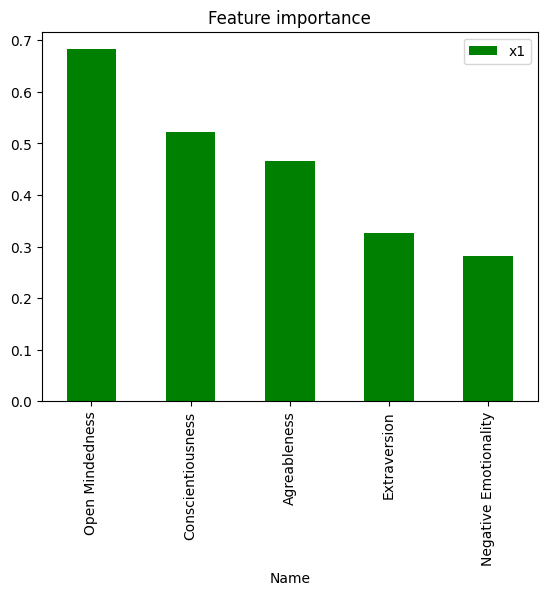

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x1_f_s.plot(kind='bar',
        x='Name',
        y='x1',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[0.682439,0.521693,0.465676,0.327139,0.281461],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x1_f_s['Name']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)
fig.show()

In [ ]:
X1_c = pd.DataFrame(X1_c[:,0])
X1_ssc = scaler.fit_transform(X1_c) #metabolic
X1_ssc = pd.DataFrame(X1_ssc)
X1_ssc

0
0   0.636067
1   0.577497
2   0.885442
3   0.375719
4   0.625931
5   0.310070
6   0.267394
7   0.218381
8   0.912423
9   0.536134
10  0.079982
11  0.352037
12  0.505326
13  0.172465
14  0.162781
15  0.264400
16  0.625905
17  0.311100
18  0.641496
19  0.296185
20  0.239022
21  0.292148
22  0.355813
23  0.174482
24  0.334644
25  0.379282
26  0.270813
27  0.554788
28  0.212669
29  0.519534
30  0.675182
31  0.644843
32  0.476579
33  0.481753
34  0.000000
35  0.658469
36  0.310411
37  0.402944
38  0.669712
39  0.413873
40  0.511053
41  0.408933
42  0.148454
43  0.295663
44  0.143729
45  0.532290
46  0.766610
47  0.409869
48  1.000000
49  0.271589
50  0.078638
51  0.324311
52  0.851447
53  0.390279
54  0.239964

In [ ]:
X1_ssc.describe()

0
count  55.000000
mean    0.421755
std     0.224387
min     0.000000
25%     0.269104
50%     0.379282
75%     0.566143
max     1.000000

In [ ]:
X2_c = pd.DataFrame(X2_c[:,0])
X2_ssc = scaler.fit_transform(X2_c) #psychology
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0   0.610485
1   0.599090
2   0.983543
3   0.339282
4   0.643155
5   0.300149
6   0.276374
7   0.221057
8   0.926627
9   0.572054
10  0.112532
11  0.357948
12  0.549263
13  0.179519
14  0.174361
15  0.306406
16  0.641238
17  0.329914
18  0.650535
19  0.354102
20  0.259475
21  0.323506
22  0.400941
23  0.219738
24  0.357578
25  0.390910
26  0.255167
27  0.536846
28  0.228897
29  0.532649
30  0.683905
31  0.657410
32  0.491293
33  0.504028
34  0.000000
35  0.671113
36  0.304767
37  0.324956
38  0.657866
39  0.421681
40  0.517738
41  0.386531
42  0.130464
43  0.267096
44  0.149372
45  0.544200
46  0.778319
47  0.413851
48  1.000000
49  0.277427
50  0.103533
51  0.383677
52  0.860126
53  0.399226
54  0.244590

In [ ]:
X2_ssc.describe()

0
count  55.000000
mean    0.432846
std     0.227432
min     0.000000
25%     0.271735
50%     0.386531
75%     0.585572
max     1.000000

In [ ]:
X1_c.describe()

0
count  5.500000e+01
mean   8.382184e-16
std    1.642895e-01
min   -3.087968e-01
25%   -1.117669e-01
50%   -3.109737e-02
75%    1.057165e-01
max    4.233742e-01

In [ ]:
X2_c.describe()

0
count  5.500000e+01
mean   2.381933e-16
std    1.736312e+00
min   -3.304521e+00
25%   -1.229987e+00
50%   -3.535874e-01
75%    1.165976e+00
max    4.329889e+00

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

0.04119629291207463


### CCA 2

In [ ]:
dft1

Unnamed: 0   g__   g__Abiotrophia   g__Actinomyces  \
0    S0046-0001_S22-taxa  2657              542            14410   
1    S0046-0002_S24-taxa   919                0              291   
2    S0046-0003_S23-taxa  4943                0            15751   
3    S0046-0004_S25-taxa  3059             1057              790   
4    S0046-0005_S26-taxa   749               19               22   
..                   ...   ...              ...              ...   
100  S0046-0108_S12-taxa  1451              114              918   
101  S0046-0111_S13-taxa  1437              553              694   
102  S0046-0112_S14-taxa  1722              167            16790   
103  S0046-0113_S15-taxa  1115                2              215   
104  S0046-0114_S16-taxa  1977              600             2603   

      g__Aggregatibacter   g__Alloprevotella   g__Anaeroglobus   g__Bacillus  \
0                   1242                   7                 6             0   
1                    288                  27                 3             0   
2                    268                 145                26            64   
3                    598                  73                35            47   
4                    167                  40                 1            30   
..                   ...                 ...               ...           ...   
100                  466                  98                 6            22   
101                  148                  17                22             0   
102                  487                3372              1305            31   
103                   82                  83                19            21   
104                  449                 258                50            57   

      g__Bacteroides_D   g__Bradyrhizobium  ...   g__Stomatobaculum  \
0                    1                  13  ...                  35   
1                    1                   7  ...                   0   
2                   41                  12  ...                  11   
3                   58                  18  ...                  18   
4                    0                   8  ...                   0   
..                 ...                 ...  ...                 ...   
100                  0                  11  ...                   3   
101                  0                  11  ...                   5   
102                  5                   4  ...                 240   
103                  3                   2  ...                   2   
104                106                  11  ...                  18   

      g__Streptococcus   g__TM7x   g__Tannerella   g__Treponema_A  \
0                57480        20             169               12   
1                14352         1              34               22   
2               474731         7              41               10   
3               256786         7              49               27   
4                19226         7              18               18   
..                 ...       ...             ...              ...   
100              54670        14             326              280   
101              51639         3              31               13   
102               8108       582            4418             1911   
103              46800         3             284               78   
104             126672         6              24              114   

      g__Treponema_B   g__Treponema_C   g__Treponema_D   g__Veillonella  \
0                 25                0               18             6150   
1                  9               16                7              296   
2                 21                1                3             7241   
3                 93                4               16             5570   
4                 22                6                4              705   
..               ...              ...              ...              ...   
100              188         

In [ ]:
Xxx = pd.concat([dft1, x12['Q12_IsSmoker']], axis=1)
dft1s =Xxx[Xxx['Q12_IsSmoker']==1]
dft1s = dft1s.drop(columns = 'Q12_IsSmoker')

In [ ]:
X1=X1_c.iloc[:, 0] #metabolic
X2=dft1s.iloc[:,1:] #bacteria #17-51-70 #g__Corynebacterium, g__Kingella_A, g__Haemophilus_D, g__Neisseria, g__Streptococcus

In [ ]:
scaler = MinMaxScaler()
X1 = np.array(X1)
X1_sc = X1.reshape(-1, 1)
X2_sc = X2

#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=1 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0    0
0  1.0  1.0
0  1.0  1.0

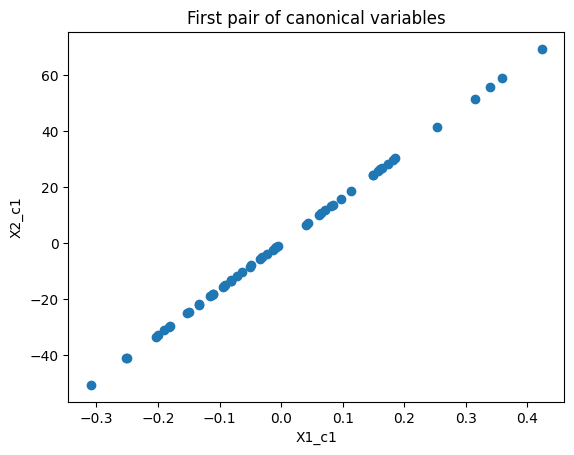

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

In [ ]:
#plt.scatter(X1_c[:, 1],X2_c[:, 1])
#plt.xlabel('X1_c1')
#plt.ylabel('X2_c1')
#plt.title('Second pair of canonical variables')
#plt.show()

In [ ]:
cca.x_loadings_

array([[1.]])

In [ ]:
#yy_load = cca.y_loadings_[:,0]
#plt.plot(yy_load)
#plt.grid()


In [ ]:
yy_load = cca.y_loadings_[:,0]
yy_load = abs(yy_load)
ind3 = dft.columns
yy_load = pd.DataFrame(yy_load)
ind3 = pd.DataFrame(ind3)
x3_f = pd.concat([ind3,yy_load],axis=1)
x3_f.columns = ['Name', 'x3']
# Sorting by column 'x1'
x3_f_s = x3_f.sort_values(by=['x3'], ascending=False)
x3_f_s

Name          x3
76       g__Veillonella  264.251677
16   g__Corynebacterium  216.327787
69     g__Streptococcus  109.526738
50         g__Neisseria   87.532683
37     g__Haemophilus_D   82.621499
..                  ...         ...
6           g__Bacillus    0.022521
8     g__Bradyrhizobium    0.018579
77            g__Vibrio    0.010200
21     g__Eubacterium_A    0.005175
30    g__Fretibacterium    0.000038

[78 rows x 2 columns]

In [ ]:
x3_f

Name          x3
0                   g__    0.542640
1        g__Abiotrophia   14.399263
2        g__Actinomyces   26.226492
3    g__Aggregatibacter   17.371086
4     g__Alloprevotella    2.939628
..                  ...         ...
73       g__Treponema_B    0.637088
74       g__Treponema_C    0.602786
75       g__Treponema_D    1.255889
76       g__Veillonella  264.251677
77            g__Vibrio    0.010200

[78 rows x 2 columns]

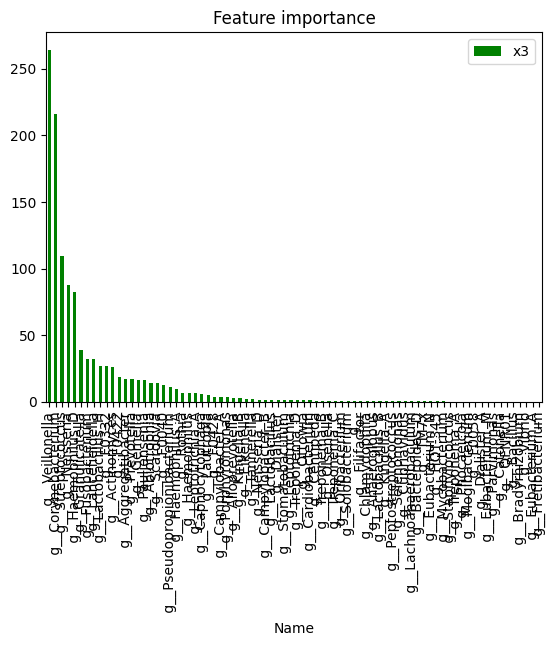

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x3_f_s.plot(kind='bar',
        x='Name',
        y='x3',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[264.2516774077883,216.32778733878783
,109.52673772469093
,87.5326828599974
,82.62149896083977
,38.59040333237469
,32.25348102563249
,32.0888944220099
,26.812474595391677
,26.698367426048435],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x3_f_s.iloc[0:10,0]))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)
fig.show()

In [ ]:
yy_load = pd.DataFrame(yy_load)
yy_load

0
0     0.542640
1    14.399263
2    26.226492
3    17.371086
4     2.939628
..         ...
73    0.637088
74    0.602786
75    1.255889
76  264.251677
77    0.010200

[78 rows x 1 columns]

In [ ]:
X1_c = pd.DataFrame(X1_c)
X1_c

0
0   0.156913
1   0.114030
2   0.339498
3  -0.033706
4   0.149492
5  -0.081773
6  -0.113018
7  -0.148905
8   0.359253
9   0.083745
10 -0.250236
11 -0.051045
12  0.061188
13 -0.182523
14 -0.189614
15 -0.115211
16  0.149473
17 -0.081018
18  0.160888
19 -0.091939
20 -0.133792
21 -0.094895
22 -0.048281
23 -0.181046
24 -0.063780
25 -0.031097
26 -0.110516
27  0.097403
28 -0.153087
29  0.071591
30  0.185552
31  0.163338
32  0.040141
33  0.043929
34 -0.308797
35  0.173315
36 -0.081523
37 -0.013773
38  0.181547
39 -0.005771
40  0.065382
41 -0.009388
42 -0.200103
43 -0.092321
44 -0.203563
45  0.080930
46  0.252493
47 -0.008703
48  0.423374
49 -0.109947
50 -0.251220
51 -0.071346
52  0.314608
53 -0.023046
54 -0.133102

In [ ]:
X2_c = pd.DataFrame(X2_c)
X2_ssc = scaler.fit_transform(X2_c) #bacteria
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0   0.636067
1   0.577497
2   0.885442
3   0.375719
4   0.625931
5   0.310070
6   0.267394
7   0.218381
8   0.912423
9   0.536134
10  0.079982
11  0.352037
12  0.505326
13  0.172465
14  0.162781
15  0.264400
16  0.625905
17  0.311100
18  0.641496
19  0.296185
20  0.239022
21  0.292148
22  0.355813
23  0.174482
24  0.334644
25  0.379282
26  0.270813
27  0.554788
28  0.212669
29  0.519534
30  0.675182
31  0.644843
32  0.476579
33  0.481753
34  0.000000
35  0.658469
36  0.310411
37  0.402944
38  0.669712
39  0.413873
40  0.511053
41  0.408933
42  0.148454
43  0.295663
44  0.143729
45  0.532290
46  0.766610
47  0.409869
48  1.000000
49  0.271589
50  0.078638
51  0.324311
52  0.851447
53  0.390279
54  0.239964

In [ ]:
X2_ssc.describe()

0
count  55.000000
mean    0.421755
std     0.224387
min     0.000000
25%     0.269104
50%     0.379282
75%     0.566143
max     1.000000

In [ ]:
X1_c.describe()

0
count  5.500000e+01
mean   7.569702e-18
std    1.642895e-01
min   -3.087968e-01
25%   -1.117669e-01
50%   -3.109737e-02
75%    1.057165e-01
max    4.233742e-01

In [ ]:
X2_c.describe()

0
count  5.500000e+01
mean   1.104571e-14
std    2.693379e+01
min   -5.062448e+01
25%   -1.832319e+01
50%   -5.098135e+00
75%    1.733128e+01
max    6.940842e+01

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

0.000124714877860797


## CCA (option 2) for non-smokers

In [ ]:
x12 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Psychological Traits and Metabolism Data.xlsx')
#Xx = pd.concat([dmic, x12['Q12_IsSmoker']],axis=1)
#Xx
x12

SampleID  Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0    S0046-0001                         10                          11   
1    S0046-0002                         12                          14   
2    S0046-0003                         11                          13   
3    S0046-0004                          8                          10   
4    S0046-0005                          9                          13   
..          ...                        ...                         ...   
100  S0046-0108                          7                           9   
101  S0046-0111                          7                          10   
102  S0046-0112                         11                          12   
103  S0046-0113                          9                           9   
104  S0046-0114                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  ...  \
0                              18.166667                   0.0  ...   
1                               2.000000                   0.0  ...   
2                               5.750000                   0.0  ...   
3                               6.750000                   0.0  ...   
4                               2.000000                   0.0  ...   
..                                  

In [ ]:
# Find indices where 'Q12_IsSmoker' is 1
dmics = x12[x12['Q12_IsSmoker']==2]

In [ ]:
dmics = dmics.drop(columns = 'Q12_IsSmoker')
dmics

SampleID  Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0    S0046-0001                         10                          11   
1    S0046-0002                         12                          14   
2    S0046-0003                         11                          13   
4    S0046-0005                          9                          13   
5    S0046-0006                         11                          15   
6    S0046-0007                         11                          13   
7    S0046-0008                         10                          11   
8    S0046-0009                         11                          13   
9    S0046-0010                         13                          15   
10   S0046-0011                         10                          13   
11   S0046-0012                          7                          12   
12   S0046-0013                          9                          12   
13   S0046-0014                          8                          11   
14   S0046-0015                          9                          11   
15   S0046-0016                         10                           8   
16   S0046-0017                         10                          12   
17   S0046-0018                          9                          15   
18   S0046-0019                          8                          13   
19   S0046-0020                         12                          13   
20   S0046-0021                         14                          11   
21   S0046-0022                          7                          13   
22   S0046-0023                          9                           6   
23   S0046-0024                         12                          12   
24   S0046-0025                          5                          15   
25   S0046-0026                          7                          14   
26   S0046-0027                         11                          13   
27   S0046-0028                          8                           9   
28   S0046-0029                          8                          15   
29   S0046-0030                         10                          13   
30   S0046-0031                         11                          15   
31   S0046-0032                         10                          15   
32   S0046-0033                         15                          10   
33   S0046-0034                         10                          11   
34   S0046-0035                         11                          10   
66   S0046-0073                         10                          12   
67   S0046-0074                         10                          10   
69   S0046-0076                          8                          10   
70   S0046-0077                          9                          11   
71   S0046-0078                         11                          11   
82   S0046-0090                          8                           9   
83   S0046-0091                         15                          10   
84   S0046-0092                          5                          10   
85   S0046-0093                         10                          12   
86   S0046-0094                          9                           9   
87   S0046-0095                          9                           8   
88   S0046-0096                          8                          12   
89   S0046-0097                         12                           7   
98   S0046-0106                          9                          13   
99   S0046-0107                          5                           4   
100  S0046-0108                          7                           9   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2      

In [ ]:
X1=dmics.iloc[:, 6:52] #metabolic #19-26-37 #Peptide methionine sulfoxide reductase, Pyridoxin (Vitamin B6) Biosynthesis, Terminal cytochrome C oxidases
X2=dmics.iloc[:, 1:6] #psychology #1-4-3 #

In [ ]:
scaler = MinMaxScaler()
X1_sc = X1
X2_sc = X2
#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0             1             0             1
0  1.000000e+00 -5.031285e-16  9.996905e-01  9.927760e-16
1 -5.031285e-16  1.000000e+00  2.495089e-03  9.901376e-01
0  9.996905e-01  2.495089e-03  1.000000e+00 -1.422854e-16
1  9.927760e-16  9.901376e-01 -1.422854e-16  1.000000e+00

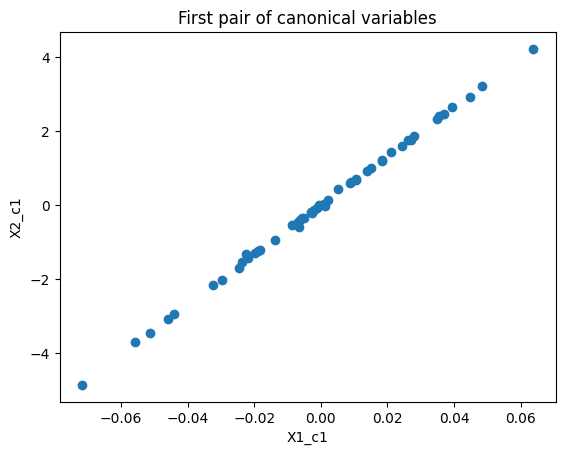

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

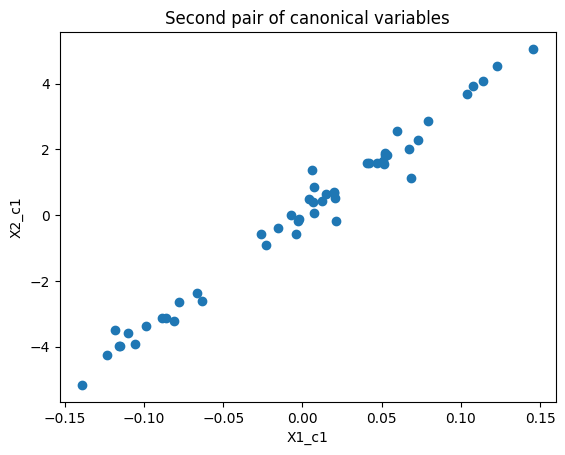

In [ ]:
plt.scatter(X1_c[:, 1],X2_c[:, 1])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('Second pair of canonical variables')
plt.show()

In [ ]:
x_load = cca.x_loadings_[:,0]
x_load = abs(x_load)
ind = ['Anaerobic Oxidative Degradation of L-Ornithine','Biogenesis of cbb3-type cytochrome c oxidases','Biogenesis of cytochrome c oxidases','CFE Sulfur Oxidation','Carbon monoxide dehydrogenase maturation factors','Carbon monoxide induced hydrogenase','Energy-conserving hydrogenase (ferredoxin)','Flavodoxin','Glutaredoxins','Glutathione-dependent pathway of formaldehyde detoxification','H2:CoM-S-S-HTP oxidoreductase','Indole-pyruvate oxidoreductase complexx','Ketoisovalerate oxidoreductase','MazEF toxin-antitoxing (programmed cell death) system','Na(+)-translocating NADH-quinone oxidoreductase & rnf-like group of electron transport complexes','Nitric oxide synthase','Novel non-oxidative pathway of Uracil catabolism','Oxidative stress','Peptide methionine sulfoxide reductase','Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed cell death) systems','Photorespiration (oxidative C2 cycle)','Photorespiration (oxidative C2 cycle) of plants','Prophage-encoded Exotoxins','Putative Toxic Anion Resistance Operon','Putative oxidase COG2907','Pyridoxin (Vitamin B6) Biosynthesis','Pyridoxin(Vitamin B6) Degradation Pathway','Pyridoxine (vitamin B6) biosynthesis of plants','Pyruvate:ferredoxin oxidoreductase','Quinol oxidases of plants (mitochondrial)','Quinone oxidoreductase family','Regulation of Oxidative Stress Response','Respiratory complexx IV (terminal cytochrome c oxidase) of plants','Sarcosine oxidases, monomeric & heterotetrameric','Sulfur oxidation','Terminal AA3-600 quinol oxidase','Terminal cytochrome C oxidases','Terminal cytochrome O ubiquinol oxidase','Terminal cytochrome d ubiquinol oxidases','Terminal cytochrome oxidases','Test Pyridoxin B6','Thioredoxin-disulfide reductase','Toxin-antitoxin replicon stabilization systems','Toxin-antitoxin system of Mycobacterium','Toxin-antitoxin systems (other than RelBE & MazEF)','trimethylamine N-oxide (TMAO) reductase']
#ind = np.arange(1,47)
x_load = pd.DataFrame(x_load)
ind = pd.DataFrame(ind)
x2_f = pd.concat([ind,x_load],axis=1)
x2_f.columns = ['Name', 'x2']
x2_f


Name           x2
0      Anaerobic Oxidative Degradation of L-Ornithine     0.939332
1       Biogenesis of cbb3-type cytochrome c oxidases    28.210754
2                 Biogenesis of cytochrome c oxidases    43.681869
3                                CFE Sulfur Oxidation     0.300215
4    Carbon monoxide dehydrogenase maturation factors     0.037027
5                 Carbon monoxide induced hydrogenase    71.838251
6          Energy-conserving hydrogenase (ferredoxin)     4.858872
7                                          Flavodoxin   219.435182
8                                       Glutaredoxins   315.258547
9   Glutathione-dependent pathway of formaldehyde ...    73.607659
10                      H2:CoM-S-S-HTP oxidoreductase     0.152769
11            Indole-pyruvate oxidoreductase complexx     1.471461
12                     Ketoisovalerate oxidoreductase    85.643586
13  MazEF toxin-antitoxing (programmed cell death)...     3.630624
14  Na(+)-translocating NADH-quinone oxidoreductas...  1445.156564
15                              Nitric oxide synthase     0.842785
16   Novel non-oxidative pathway of Uracil catabolism     0.333386
17                                   Oxidative stress   432.335777
18             Peptide methionine sulfoxide reductase   736.626211
19  Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed...    26.076268
20              Photorespiration (oxidative C2 cycle)    48.491264
21    Photorespiration (oxidative C2 cycle) of plants     1.162765
22                         Prophage-encoded Exotoxins     1.180269
23             Putative Toxic Anion Resistance Operon   255.743840
24                           Putative oxidase COG2907    80.808472
25                Pyridoxin (Vitamin B6) Biosynthesis   151.704749
26          Pyridoxin(Vitamin B6) Degradation Pathway     0.132171
27     Pyridoxine (vitamin B6) biosynthesis of plants     7.376200
28                 Pyruvate:ferredoxin oxidoreductase   208.267468
29          Quinol oxidases of plants (mitochondrial)     0.000000
30                      Quinone oxidoreductase family    76.897144
31            Regulation of Oxidative Stress Response   186.088608
32  Respiratory complexx IV (terminal cytochrome c...     0.044252
33   Sarcosine oxidases, monomeric & heterotetrameric     0.961297
34                                   Sulfur oxidation    44.759061
35                    Terminal AA3-600 quinol oxidase     0.000000
36                     Terminal cytochrome C oxidases   114.820290
37            Terminal cytochrome O ubiquinol oxidase     5.136354
38           Terminal cytochrome d ubiquinol oxidases   349.663234
39                       Terminal cytochrome oxidases   338.537890
40                                  Test Pyridoxin B6   279.220643
41                    Thioredoxin-disulfide reductase   146.134550
42     Toxin-antitoxin replicon stabilization systems    40.252915
43            Toxin-antitoxin system of Mycobacterium     0.139442
44  Toxin-antitoxin systems (other than RelBE & Ma...   147.403186
45            trimethylamine N-oxide (TMAO) reductase   108.946428

In [ ]:
# Sorting by column 'x2'
x2_f_s = x2_f.sort_values(by=['x2'], ascending=False)
x2_f_s

Name           x2
14  Na(+)-translocating NADH-quinone oxidoreductas...  1445.156564
18             Peptide methionine sulfoxide reductase   736.626211
17                                   Oxidative stress   432.335777
38           Terminal cytochrome d ubiquinol oxidases   349.663234
39                       Terminal cytochrome oxidases   338.537890
8                                       Glutaredoxins   315.258547
40                                  Test Pyridoxin B6   279.220643
23             Putative Toxic Anion Resistance Operon   255.743840
7                                          Flavodoxin   219.435182
28                 Pyruvate:ferredoxin oxidoreductase   208.267468
31            Regulation of Oxidative Stress Response   186.088608
25                Pyridoxin (Vitamin B6) Biosynthesis   151.704749
44  Toxin-antitoxin systems (other than RelBE & Ma...   147.403186
41                    Thioredoxin-disulfide reductase   146.134550
36                     Terminal cytochrome C oxidases   114.820290
45            trimethylamine N-oxide (TMAO) reductase   108.946428
12                     Ketoisovalerate oxidoreductase    85.643586
24                           Putative oxidase COG2907    80.808472
30                      Quinone oxidoreductase family    76.897144
9   Glutathione-dependent pathway of formaldehyde ...    73.607659
5                 Carbon monoxide induced hydrogenase    71.838251
20              Photorespiration (oxidative C2 cycle)    48.491264
34                                   Sulfur oxidation    44.759061
2                 Biogenesis of cytochrome c oxidases    43.681869
42     Toxin-antitoxin replicon stabilization systems    40.252915
1       Biogenesis of cbb3-type cytochrome c oxidases    28.210754
19  Phd-Doc, YdcE-YdcD toxin-antitoxin (programmed...    26.076268
27     Pyridoxine (vitamin B6) biosynthesis of plants     7.376200
37            Terminal cytochrome O ubiquinol oxidase     5.136354
6          Energy-conserving hydrogenase (ferredoxin)     4.858872
13  MazEF toxin-antitoxing (programmed cell death)...     3.630624
11            Indole-pyruvate oxidoreductase complexx     1.471461
22                         Prophage-encoded Exotoxins     1.180269
21    Photorespiration (oxidative C2 cycle) of plants     1.162765
33   Sarcosine oxidases, monomeric & heterotetrameric     0.961297
0      Anaerobic Oxidative Degradation of L-Ornithine     0.939332
15                              Nitric oxide synthase     0.842785
16   Novel non-oxidative pathway of Uracil catabolism     0.333386
3                                CFE Sulfur Oxidation     0.300215
10                      H2:CoM-S-S-HTP oxidoreductase     0.152769
43            Toxin-antitoxin system of Mycobacterium     0.139442
26          Pyridoxin(Vitamin B6) Degradation Pathway     0.132171
32  Respiratory complexx IV (terminal cytochrome c...     0.044252
4    Carbon monoxide dehydrogenase maturation factors     0.037027
35                    Terminal AA3-600 quinol oxidase     0.000000
29          Quinol oxidases of plants (mitochondrial)     0.000000

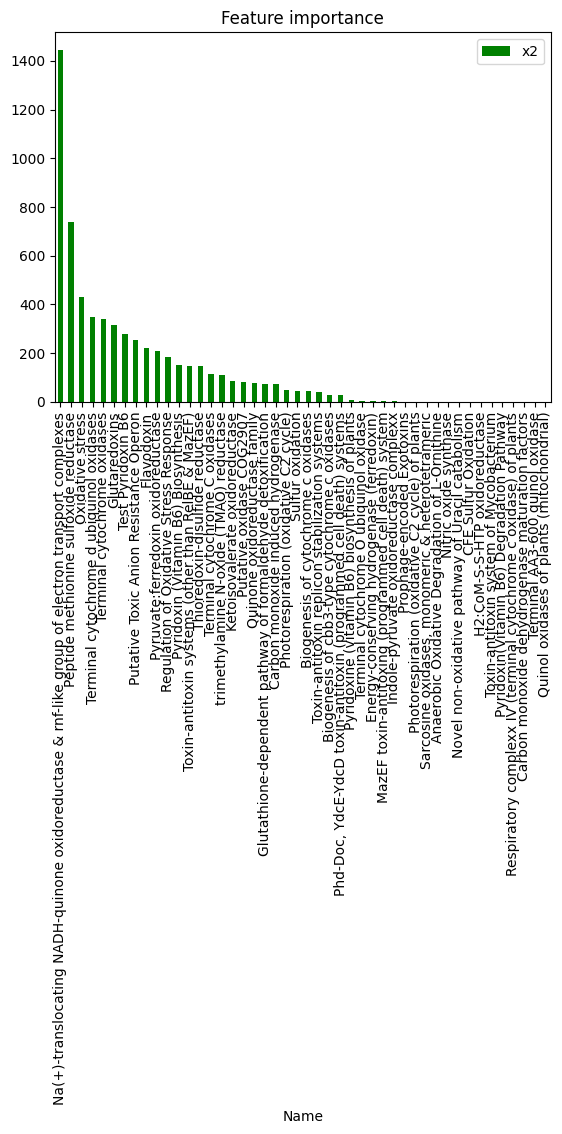

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x2_f_s.plot(kind='bar',
        x='Name',
        y='x2',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1445.156564,736.626211,432.335777,349.663234,338.537890
,315.258547
,279.220643
,255.743840
,219.435182
,208.267468],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x2_f_s.iloc[0:10,0]))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)
fig.show()

In [ ]:
#x_load

In [ ]:
y_load = cca.y_loadings_[:,0]
y_load = abs(y_load)
ind1 = ['Extraversion', 'Agreableness','Conscientiousness','Negative Emotionality','Open Mindedness']
y_load = pd.DataFrame(y_load)
ind1 = pd.DataFrame(ind1)
x1_f = pd.concat([ind1,y_load],axis=1)
x1_f.columns = ['Name', 'x1']
# Sorting by column 'x1'
x1_f_s = x1_f.sort_values(by=['x1'], ascending=False)
x1_f_s

Name        x1
3  Negative Emotionality  0.970717
4        Open Mindedness  0.690806
0           Extraversion  0.187474
1           Agreableness  0.137572
2      Conscientiousness  0.068406

In [ ]:
x1_f

Name        x1
0           Extraversion  0.187474
1           Agreableness  0.137572
2      Conscientiousness  0.068406
3  Negative Emotionality  0.970717
4        Open Mindedness  0.690806

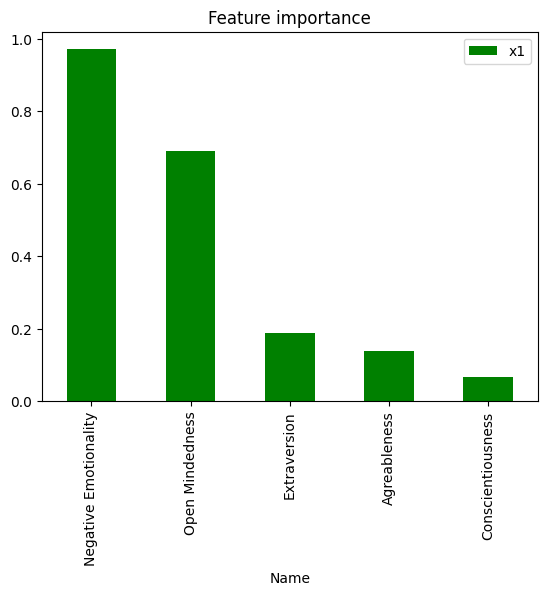

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x1_f_s.plot(kind='bar',
        x='Name',
        y='x1',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[0.970717,0.690806
,0.187474
,0.137572
,0.068406],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x1_f_s['Name']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)
fig.show()

In [ ]:
X1_c = pd.DataFrame(X1_c[:,0])
X1_ssc = scaler.fit_transform(X1_c) #metabolic
X1_ssc = pd.DataFrame(X1_ssc)
X1_ssc

0
0   0.464194
1   0.594370
2   0.117335
3   0.363280
4   0.366927
5   0.685317
6   0.786272
7   0.290196
8   0.483751
9   0.491097
10  0.479995
11  0.595647
12  0.520947
13  0.723251
14  0.354545
15  0.664006
16  0.189623
17  0.427229
18  0.149483
19  0.395313
20  0.664340
21  1.000000
22  0.000000
23  0.525380
24  0.544386
25  0.389858
26  0.606612
27  0.859469
28  0.640550
29  0.791924
30  0.801739
31  0.309019
32  0.513850
33  0.507915
34  0.508644
35  0.607965
36  0.488287
37  0.887253
38  0.537504
39  0.631083
40  0.708408
41  0.535366
42  0.820525
43  0.566242
44  0.202998
45  0.478122
46  0.736515
47  0.347308
48  0.383313
49  0.729886

In [ ]:
X1_ssc.describe()

0
count  50.000000
mean    0.529345
std     0.208771
min     0.000000
25%     0.391222
50%     0.523164
75%     0.664257
max     1.000000

In [ ]:
X2_c = pd.DataFrame(X2_c[:,0])
X2_ssc = scaler.fit_transform(X2_c) #psychology
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0   0.474671
1   0.599965
2   0.126999
3   0.389981
4   0.376563
5   0.694275
6   0.791355
7   0.297422
8   0.490528
9   0.498061
10  0.469649
11  0.603256
12  0.526878
13  0.730261
14  0.366705
15  0.666741
16  0.196505
17  0.430819
18  0.155181
19  0.402631
20  0.668890
21  1.000000
22  0.000000
23  0.536919
24  0.551446
25  0.397231
26  0.609397
27  0.855583
28  0.644330
29  0.799963
30  0.805497
31  0.313064
32  0.520858
33  0.513845
34  0.511717
35  0.612290
36  0.495932
37  0.889800
38  0.533643
39  0.636208
40  0.712038
41  0.538818
42  0.826280
43  0.582364
44  0.212437
45  0.484291
46  0.742254
47  0.348043
48  0.392441
49  0.728018

In [ ]:
X2_ssc.describe()

0
count  50.000000
mean    0.535041
std     0.207474
min     0.000000
25%     0.398581
50%     0.530260
75%     0.668353
max     1.000000

In [ ]:
X1_c.describe()

0
count  5.000000e+01
mean  -2.927519e-16
std    2.828781e-02
min   -7.172457e-02
25%   -1.871524e-02
50%   -8.375221e-04
75%    1.828015e-02
max    6.377234e-02

In [ ]:
X2_c.describe()

0
count  5.000000e+01
mean   1.554312e-16
std    1.882408e+00
min   -4.854407e+00
25%   -1.238093e+00
50%   -4.337197e-02
75%    1.209534e+00
max    4.218559e+00

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

0.0145036734178835


### CCA 2

In [ ]:
dft1

Unnamed: 0   g__   g__Abiotrophia   g__Actinomyces  \
0    S0046-0001_S22-taxa  2657              542            14410   
1    S0046-0002_S24-taxa   919                0              291   
2    S0046-0003_S23-taxa  4943                0            15751   
3    S0046-0004_S25-taxa  3059             1057              790   
4    S0046-0005_S26-taxa   749               19               22   
..                   ...   ...              ...              ...   
100  S0046-0108_S12-taxa  1451              114              918   
101  S0046-0111_S13-taxa  1437              553              694   
102  S0046-0112_S14-taxa  1722              167            16790   
103  S0046-0113_S15-taxa  1115                2              215   
104  S0046-0114_S16-taxa  1977              600             2603   

      g__Aggregatibacter   g__Alloprevotella   g__Anaeroglobus   g__Bacillus  \
0                   1242                   7                 6             0   
1                    288                  27                 3             0   
2                    268                 145                26            64   
3                    598                  73                35            47   
4                    167                  40                 1            30   
..                   ...                 ...               ...           ...   
100                  466                  98                 6            22   
101                  148                  17                22             0   
102                  487                3372              1305            31   
103                   82                  83                19            21   
104                  449                 258                50            57   

      g__Bacteroides_D   g__Bradyrhizobium  ...   g__Stomatobaculum  \
0                    1                  13  ...                  35   
1                    1                   7  ...                   0   
2                   41                  12  ...                  11   
3                   58                  18  ...                  18   
4                    0                   8  ...                   0   
..                 ...                 ...  ...                 ...   
100                  0                  11  ...                   3   
101                  0                  11  ...                   5   
102                  5                   4  ...                 240   
103                  3                   2  ...                   2   
104                106                  11  ...                  18   

      g__Streptococcus   g__TM7x   g__Tannerella   g__Treponema_A  \
0                57480        20             169               12   
1                14352         1              34               22   
2               474731         7              41               10   
3               256786         7              49               27   
4                19226         7              18               18   
..                 ...       ...             ...              ...   
100              54670        14             326              280   
101              51639         3              31               13   
102               8108       582            4418             1911   
103              46800         3             284               78   
104             126672         6              24              114   

      g__Treponema_B   g__Treponema_C   g__Treponema_D   g__Veillonella  \
0                 25                0               18             6150   
1                  9               16                7              296   
2                 21                1                3             7241   
3                 93                4               16             5570   
4                 22                6                4              705   
..               ...              ...              ...              ...   
100              188         

In [ ]:
Xxx = pd.concat([dft1, x12['Q12_IsSmoker']], axis=1)
dft1s =Xxx[Xxx['Q12_IsSmoker']==2]
dft1s = dft1s.drop(columns = 'Q12_IsSmoker')

In [ ]:
X1=X1_c.iloc[:, 0] #metabolic
X2=dft1s.iloc[:,1:] #bacteria #17-51-70 #g__Corynebacterium, g__Kingella_A, g__Haemophilus_D, g__Neisseria, g__Streptococcus

In [ ]:
scaler = MinMaxScaler()
X1 = np.array(X1)
X1_sc = X1.reshape(-1, 1)
X2_sc = X2

#X1_sc = scaler.fit_transform(X1) #scale data
#X2_sc = scaler.fit_transform(X2)
n_comp=1 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

In [ ]:
X1_cr = pd.DataFrame(X1_c)
X2_cr = pd.DataFrame(X2_c)
coeff = pd.concat([X1_cr,X2_cr],axis=1)
coeff.corr()

0    0
0  1.0  1.0
0  1.0  1.0

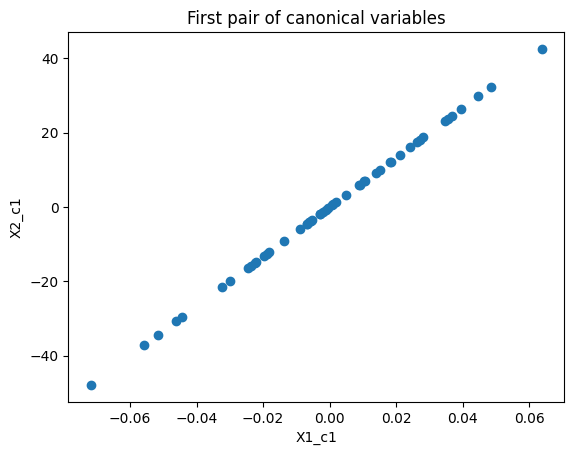

In [ ]:
plt.scatter(X1_c[:, 0],X2_c[:, 0])
plt.xlabel('X1_c1')
plt.ylabel('X2_c1')
plt.title('First pair of canonical variables')
plt.show()

In [ ]:
#plt.scatter(X1_c[:, 1],X2_c[:, 1])
#plt.xlabel('X1_c1')
#plt.ylabel('X2_c1')
#plt.title('Second pair of canonical variables')
#plt.show()

In [ ]:
cca.x_loadings_

array([[1.]])

In [ ]:
#yy_load = cca.y_loadings_[:,0]
#plt.plot(yy_load)
#plt.grid()


In [ ]:
yy_load = cca.y_loadings_[:,0]
yy_load = abs(yy_load)
ind3 = dft.columns
yy_load = pd.DataFrame(yy_load)
ind3 = pd.DataFrame(ind3)
x3_f = pd.concat([ind3,yy_load],axis=1)
x3_f.columns = ['Name', 'x3']
# Sorting by column 'x1'
x3_f_s = x3_f.sort_values(by=['x3'], ascending=False)
x3_f_s

Name          x3
69     g__Streptococcus  784.477617
37     g__Haemophilus_D  225.633656
76       g__Veillonella  122.596231
11    g__Capnocytophaga  107.045791
16   g__Corynebacterium   99.386861
..                  ...         ...
15     g__Chlamydophila    0.026936
77            g__Vibrio    0.025048
62            g__QFNR01    0.022119
67    g__Staphylococcus    0.004341
58       g__Phocaeicola    0.002400

[78 rows x 2 columns]

In [ ]:
x3_f

Name          x3
0                   g__    6.148512
1        g__Abiotrophia   20.395609
2        g__Actinomyces   38.300955
3    g__Aggregatibacter    9.331273
4     g__Alloprevotella    0.695938
..                  ...         ...
73       g__Treponema_B    0.343176
74       g__Treponema_C    0.222221
75       g__Treponema_D    1.807220
76       g__Veillonella  122.596231
77            g__Vibrio    0.025048

[78 rows x 2 columns]

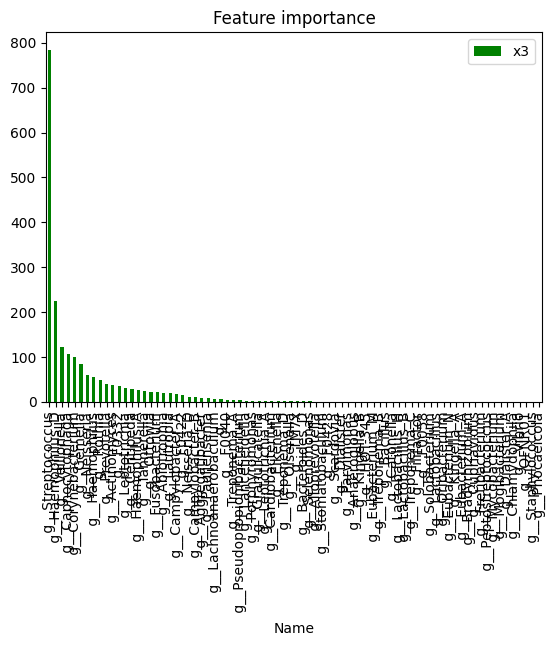

In [ ]:
#plt.plot(x2_f_s)
#plt.grid()

# bar plot
x3_f_s.plot(kind='bar',
        x='Name',
        y='x3',
        color='green')

# set the title
plt.title('Feature importance')

# show the plot
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[784.4776166737482,225.63365614060547
,122.59623114970987
,107.04579076974912
,99.38686057844855
,84.22760023885995
,58.99163103893371
,55.784416018799604
,49.13400003494573
,40.11039991770207],
    #theta=['a','b','c','d','e','f','g','h','i','j']))
    theta=x3_f_s.iloc[0:10,0]))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
# Update layout to increase font size of labels
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=15)  # Adjust radial axis font size
        ),
        angularaxis=dict(
            tickfont=dict(size=15)  # Adjust angular axis font size
        )
    )
)
fig.show()

In [ ]:
yy_load = pd.DataFrame(yy_load)
yy_load

0
0     6.148512
1    20.395609
2    38.300955
3     9.331273
4     0.695938
..         ...
73    0.343176
74    0.222221
75    1.807220
76  122.596231
77    0.025048

[78 rows x 1 columns]

In [ ]:
X1_c = pd.DataFrame(X1_c)
X1_c

0
0  -0.008828
1   0.008811
2  -0.055826
3  -0.022501
4  -0.022007
5   0.021134
6   0.034813
7  -0.032404
8  -0.006178
9  -0.005182
10 -0.006687
11  0.008984
12 -0.001138
13  0.026274
14 -0.023685
15  0.018246
16 -0.046031
17 -0.013836
18 -0.051470
19 -0.018161
20  0.018291
21  0.063772
22 -0.071725
23 -0.000537
24  0.002038
25 -0.018900
26  0.010469
27  0.044731
28  0.015068
29  0.035579
30  0.036909
31 -0.029854
32 -0.002099
33 -0.002904
34 -0.002805
35  0.010653
36 -0.005563
37  0.048495
38  0.001106
39  0.013785
40  0.024263
41  0.000816
42  0.039454
43  0.004999
44 -0.044219
45 -0.006940
46  0.028071
47 -0.024665
48 -0.019787
49  0.027173

In [ ]:
X2_c = pd.DataFrame(X2_c)
X2_ssc = scaler.fit_transform(X2_c) #bacteria
X2_ssc = pd.DataFrame(X2_ssc)
X2_ssc

0
0   0.464194
1   0.594370
2   0.117335
3   0.363280
4   0.366927
5   0.685317
6   0.786272
7   0.290196
8   0.483751
9   0.491097
10  0.479995
11  0.595647
12  0.520947
13  0.723251
14  0.354545
15  0.664006
16  0.189623
17  0.427229
18  0.149483
19  0.395313
20  0.664340
21  1.000000
22  0.000000
23  0.525380
24  0.544386
25  0.389858
26  0.606612
27  0.859469
28  0.640550
29  0.791924
30  0.801739
31  0.309019
32  0.513850
33  0.507915
34  0.508644
35  0.607965
36  0.488287
37  0.887253
38  0.537504
39  0.631083
40  0.708408
41  0.535366
42  0.820525
43  0.566242
44  0.202998
45  0.478122
46  0.736515
47  0.347308
48  0.383313
49  0.729886

In [ ]:
X2_ssc.describe()

0
count  50.000000
mean    0.529345
std     0.208771
min     0.000000
25%     0.391222
50%     0.523164
75%     0.664257
max     1.000000

In [ ]:
X1_c.describe()

0
count  5.000000e+01
mean  -2.081668e-19
std    2.828781e-02
min   -7.172457e-02
25%   -1.871524e-02
50%   -8.375221e-04
75%    1.828015e-02
max    6.377234e-02

In [ ]:
X2_c.describe()

0
count  5.000000e+01
mean  -2.259526e-14
std    1.888266e+01
min   -4.787753e+01
25%   -1.249278e+01
50%   -5.590621e-01
75%    1.220235e+01
max    4.256926e+01

In [ ]:
# Score the CCA model
score = cca.score(X1_sc, X2_sc)

# Print the score
print(score)

6.120118404584485e-05
